# AIVLE스쿨 2차 미니프로젝트: 신규 아파트 주차 수요 예측

<img src = "https://github.com/Jangrae/img/blob/master/parking.png?raw=true" width=800, align="left"/>

# 단계 2: 탐색적 데이터 분석

## [미션]

단계1 에서 생성한 데이터에 대해서 탐색적 분석을 수행합니다.

1) 단변량 분석
    - 숫자형, 범주형 변수에 맞게 데이터를 탐색하며 비즈니스적 의미를 파악합니다.
2) 이변량 분석
    - 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
    - 범주형 변수 → 실차량수 관계를 분석합니다.
3) 전처리(추가)
    - 범주형 변수 중에는 범줏값 개수가 적은 범주들은 유사한 범주끼리 묶어 봅니다.
    - 불필요한 변수를 제거합니다.

## 1. 환경설정

### (1) 로컬 수행(Anaconda)

- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 기본 경로
path = '/content/drive/MyDrive/2024.10.07_미니프로젝트 2차_실습자료/'

In [10]:
# 파일 읽어오기
data = joblib.load(path+'base_data2.pkl')

# 확인
data.head()

,총세대수,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,면적70_80,면적80_200,임대보증금,임대료
0,78,2013,계단식,개별,1,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,35,2013,복도식,개별,1,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,88,2013,계단식,개별,1,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,477,2014,복도식,지역,1,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,15,2013,복도식,개별,1,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333


In [11]:
# 파일 읽어오기
data = joblib.load(path+'base_data2__a.pkl')

# 확인
data.head()

,총세대수,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적10-30,면적30-40,면적40-50,면적50-60,면적60-70,면적70-80,면적80-200,임대보증금,임대료
0,78,2013,계단식,개별,1,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,35,2013,복도식,개별,1,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,88,2013,계단식,개별,1,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,477,2014,복도식,지역,1,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,15,2013,복도식,개별,1,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333


총면적에 따른 실차량수 t-test 결과: TtestResult(statistic=16.19513471191119, pvalue=3.243979032233779e-44, df=343.0)


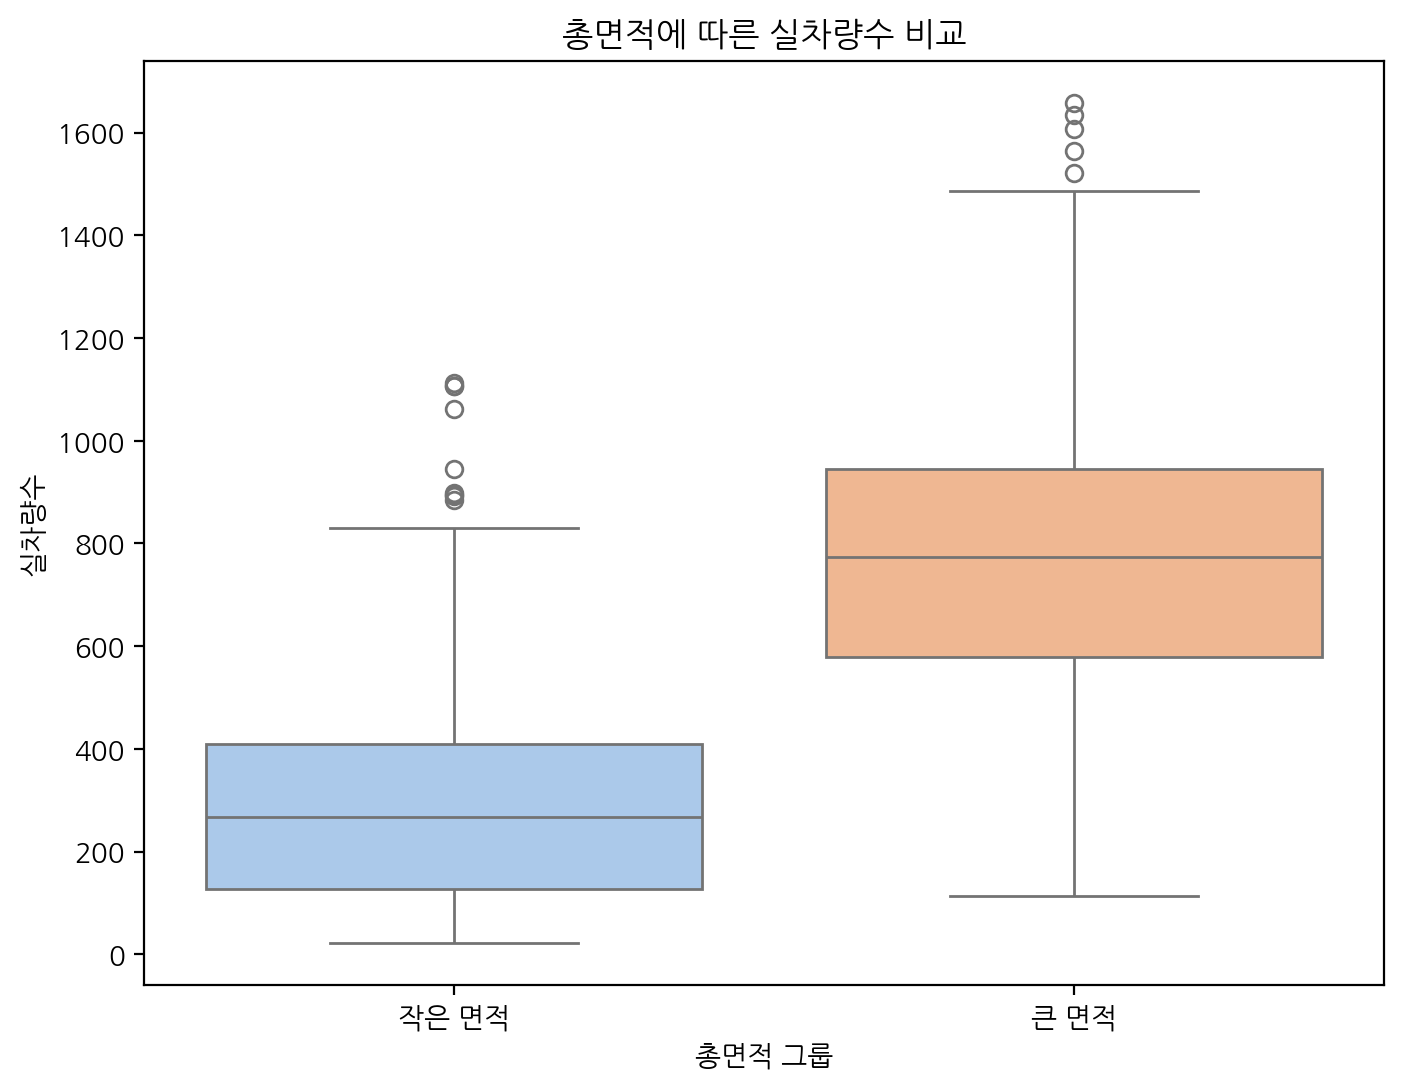

총세대수에 따른 실차량수 t-test 결과: TtestResult(statistic=13.088334563407281, pvalue=4.99888079429111e-32, df=343.0)


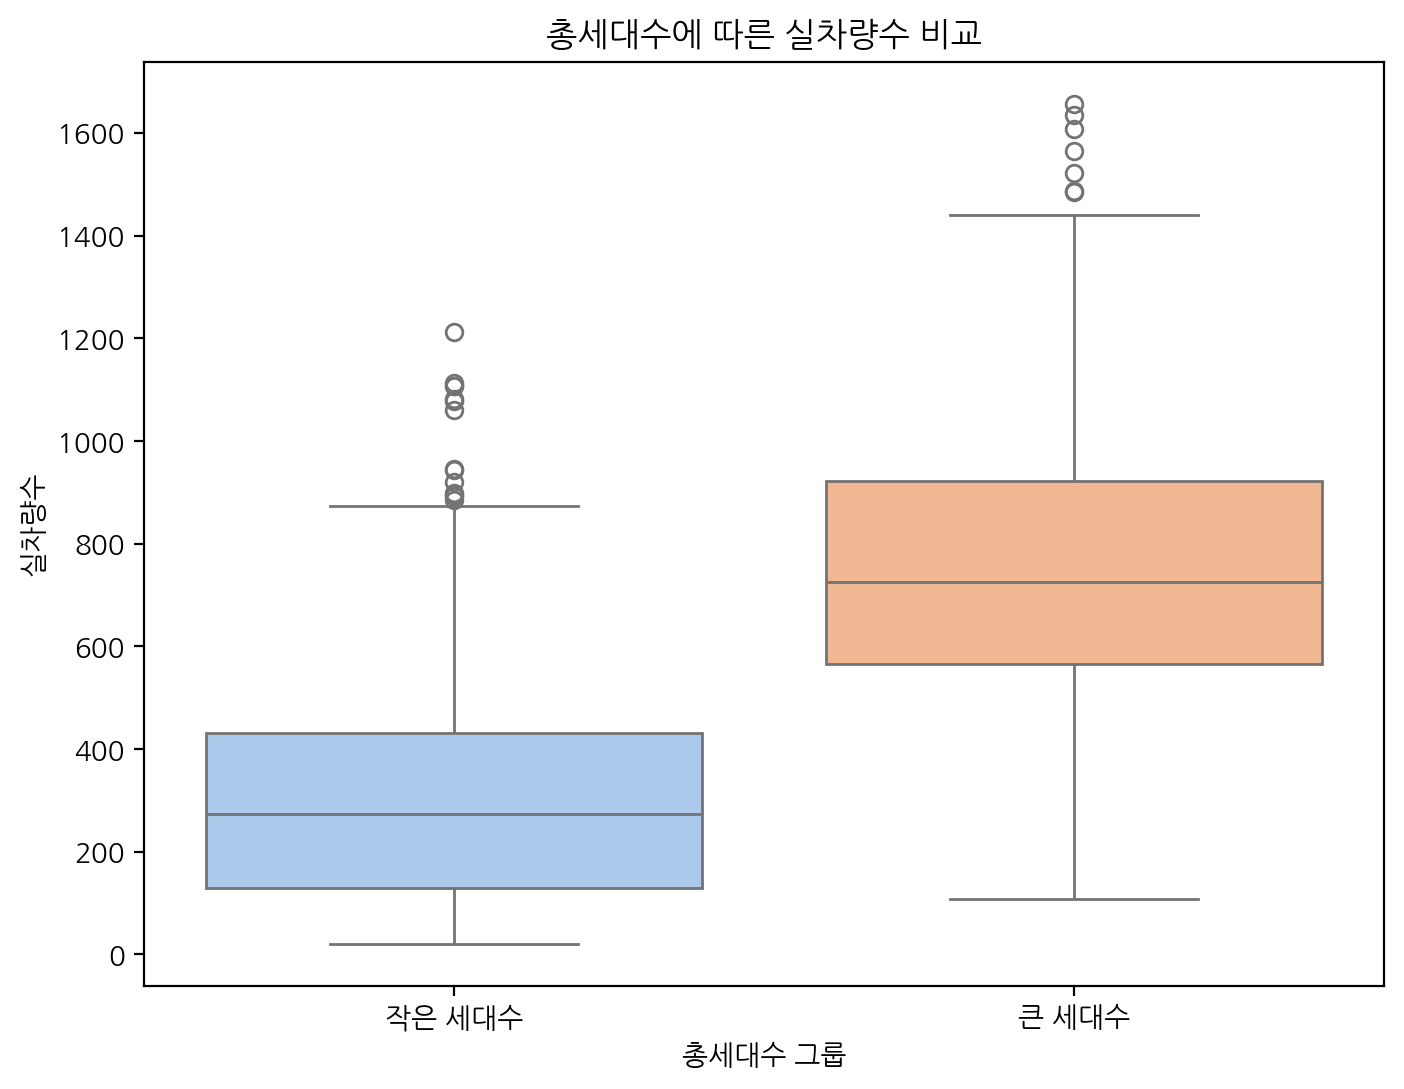

In [16]:
import pandas as pd
from scipy.stats import f_oneway, ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

data = joblib.load(path+'base_data2__a.pkl')

# 1. 총면적이 크면 실차량수가 높다.
# 총면적의 중간값을 기준으로 그룹을 나눔
median_area = data['총면적'].median()
large_area = data[data['총면적'] >= median_area]['실차량수']
small_area = data[data['총면적'] < median_area]['실차량수']

# t-test
t_test_area = ttest_ind(large_area, small_area)
print("총면적에 따른 실차량수 t-test 결과:", t_test_area)

# 시각화 (총면적 기준 그룹별 실차량수)
data['총면적_그룹'] = ['큰 면적' if x >= median_area else '작은 면적' for x in data['총면적']]
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='총면적_그룹', y='실차량수', palette='pastel')
plt.title("총면적에 따른 실차량수 비교")
plt.xlabel("총면적 그룹")
plt.ylabel("실차량수")
plt.show()

# 2. 총세대수가 크면 실차량수가 많다.
# 총세대수의 중간값을 기준으로 그룹을 나눔
median_households = data['총세대수'].median()
large_households = data[data['총세대수'] >= median_households]['실차량수']
small_households = data[data['총세대수'] < median_households]['실차량수']

# t-test
t_test_households = ttest_ind(large_households, small_households)
print("총세대수에 따른 실차량수 t-test 결과:", t_test_households)

# 시각화 (총세대수 기준 그룹별 실차량수)
data['총세대수_그룹'] = ['큰 세대수' if x >= median_households else '작은 세대수' for x in data['총세대수']]
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='총세대수_그룹', y='실차량수', palette='pastel')
plt.title("총세대수에 따른 실차량수 비교")
plt.xlabel("총세대수 그룹")
plt.ylabel("실차량수")
plt.show()

총면적과 실차량수 간의 상관계수: 0.8222883176799547
총세대수와 실차량수 간의 상관계수: 0.7124746462088553


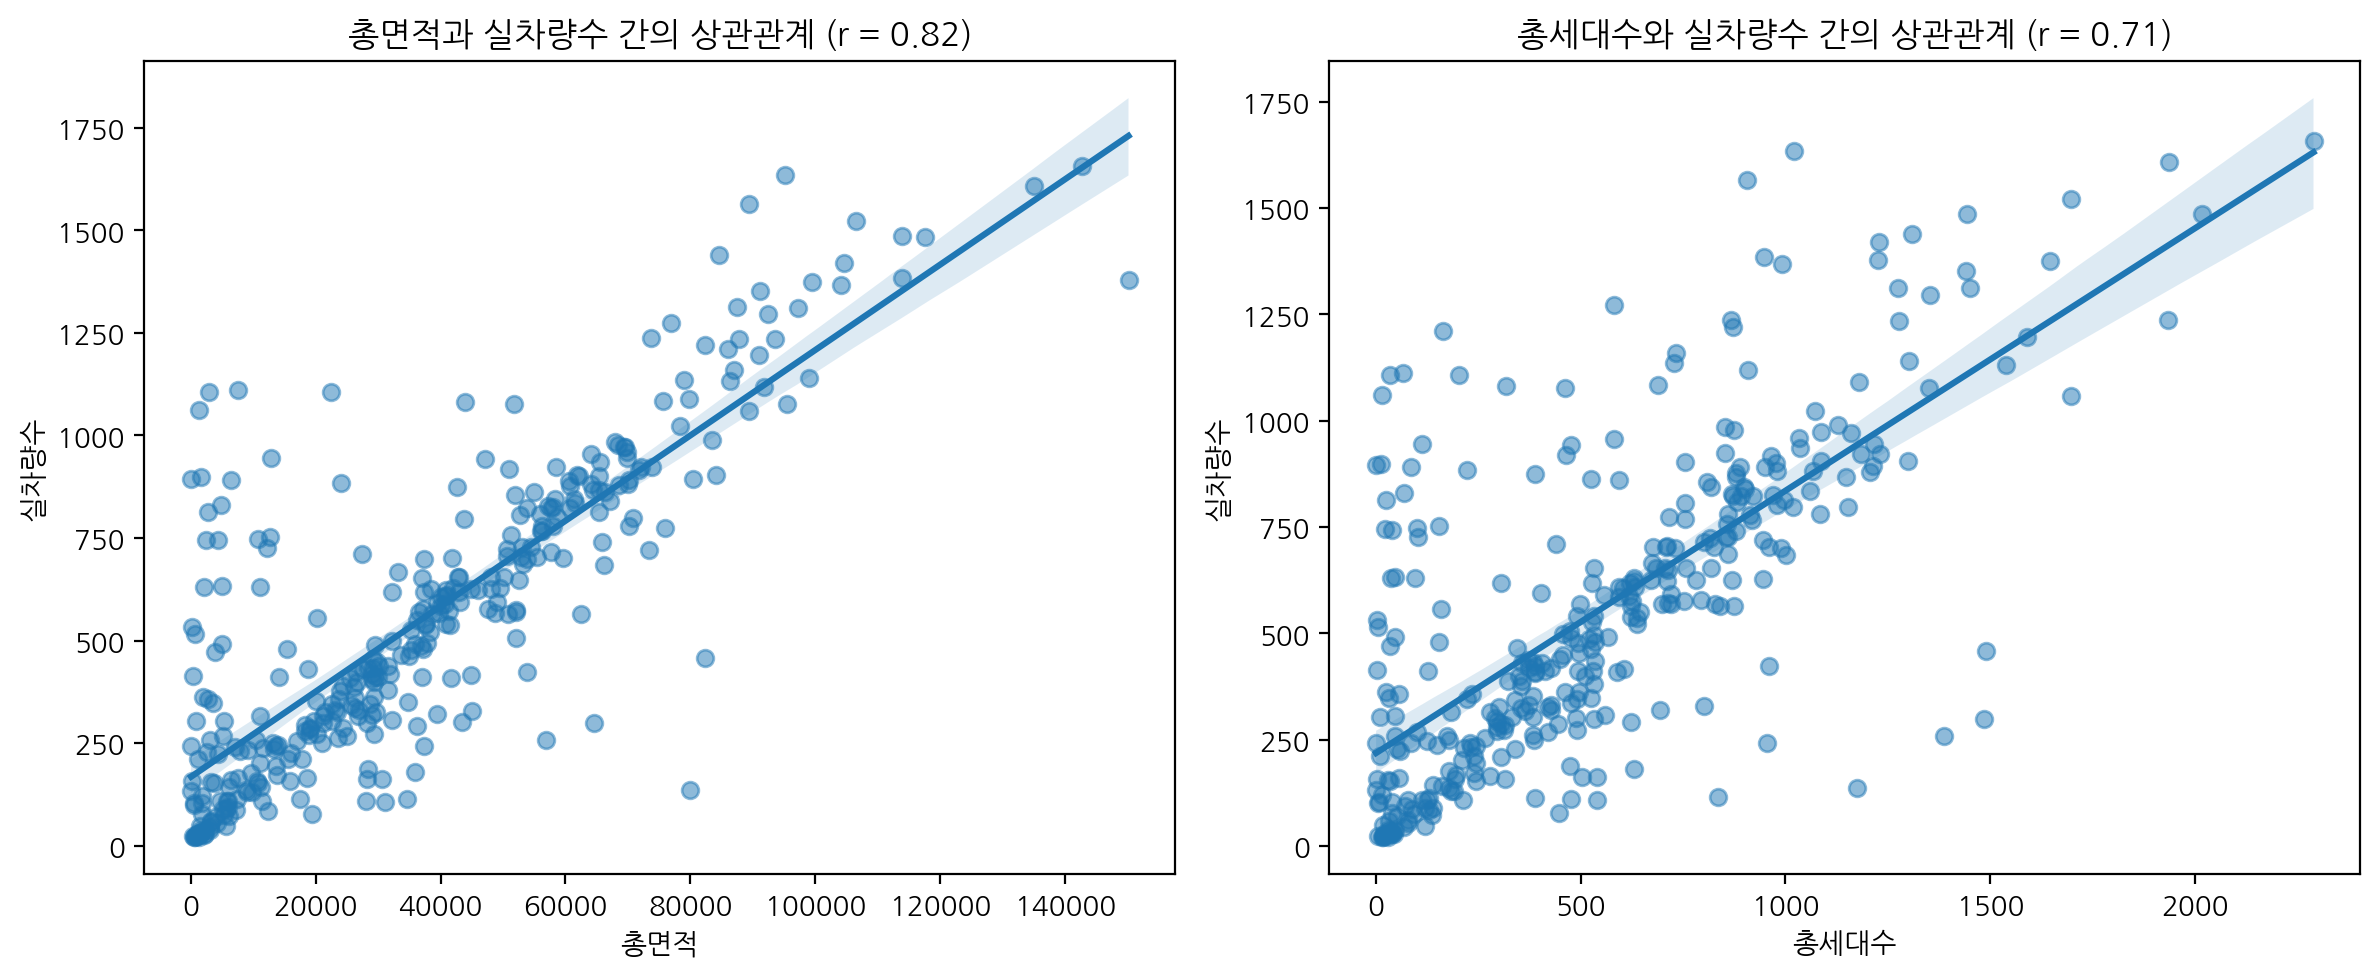

In [17]:

# 1. 상관계수 계산
correlation_area_vehicle = data['총면적'].corr(data['실차량수'])
correlation_household_vehicle = data['총세대수'].corr(data['실차량수'])

print("총면적과 실차량수 간의 상관계수:", correlation_area_vehicle)
print("총세대수와 실차량수 간의 상관계수:", correlation_household_vehicle)

# 2. 상관관계 시각화 (산점도 및 회귀선)
plt.figure(figsize=(12, 5))

# 총면적과 실차량수 간의 상관관계 시각화
plt.subplot(1, 2, 1)
sns.regplot(x='총면적', y='실차량수', data=data, scatter_kws={'alpha':0.5})
plt.title(f"총면적과 실차량수 간의 상관관계 (r = {correlation_area_vehicle:.2f})")
plt.xlabel("총면적")
plt.ylabel("실차량수")

# 총세대수와 실차량수 간의 상관관계 시각화
plt.subplot(1, 2, 2)
sns.regplot(x='총세대수', y='실차량수', data=data, scatter_kws={'alpha':0.5})
plt.title(f"총세대수와 실차량수 간의 상관관계 (r = {correlation_household_vehicle:.2f})")
plt.xlabel("총세대수")
plt.ylabel("실차량수")

plt.tight_layout()
plt.show()

In [18]:
# 총면적을 기준으로 그룹 나누기 (중간값 기준)
median_area = data['총면적'].median()
group_large_area = data[data['총면적'] >= median_area]['실차량수']
group_small_area = data[data['총면적'] < median_area]['실차량수']

# ANOVA 분석: 총면적에 따른 실차량수 차이
anova_result_area = f_oneway(group_large_area, group_small_area)
print("ANOVA 결과 (총면적에 따른 실차량수 차이):", anova_result_area)

# 총세대수를 기준으로 그룹 나누기 (중간값 기준)
median_households = data['총세대수'].median()
group_large_households = data[data['총세대수'] >= median_households]['실차량수']
group_small_households = data[data['총세대수'] < median_households]['실차량수']

# ANOVA 분석: 총세대수에 따른 실차량수 차이
anova_result_households = f_oneway(group_large_households, group_small_households)
print("ANOVA 결과 (총세대수에 따른 실차량수 차이):", anova_result_households)

ANOVA 결과 (총면적에 따른 실차량수 차이): F_onewayResult(statistic=262.28238833695076, pvalue=3.2439790322335415e-44)
ANOVA 결과 (총세대수에 따른 실차량수 차이): F_onewayResult(statistic=171.3045016436817, pvalue=4.99888079429061e-32)


In [22]:
# 1. 총면적을 기준으로 그룹 나누기 (중간값 기준)
median_area = data['총면적'].median()
data['총면적_그룹'] = ['큰 면적' if x >= median_area else '작은 면적' for x in data['총면적']]

# 2. 총세대수를 기준으로 그룹 나누기 (중간값 기준)
median_households = data['총세대수'].median()
data['총세대수_그룹'] = ['큰 세대수' if x >= median_households else '작은 세대수' for x in data['총세대수']]

# 3. 준공연도를 기준으로 그룹 나누기 (예: 1990년 이전, 1990~2000년, 2000년 이후)
data['준공연도_그룹'] = pd.cut(data['준공연도'], bins=[1990, 2000, 2010, 2100],
                            labels=['1990년 이전', '1990~2000년', '2000년 이후'])

# 4. ANOVA 분석
# 총면적, 총세대수, 준공연도 그룹 간의 실차량수 평균 차이를 분석
anova_result_area = f_oneway(
    data[data['총면적_그룹'] == '큰 면적']['실차량수'],
    data[data['총면적_그룹'] == '작은 면적']['실차량수']
)
anova_result_households = f_oneway(
    data[data['총세대수_그룹'] == '큰 세대수']['실차량수'],
    data[data['총세대수_그룹'] == '작은 세대수']['실차량수']
)
anova_result_year = f_oneway(
    data[data['준공연도_그룹'] == '1990년 이전']['실차량수'],
    data[data['준공연도_그룹'] == '1990~2000년']['실차량수'],
    data[data['준공연도_그룹'] == '2000년 이후']['실차량수']
)

print("ANOVA 결과 (총면적에 따른 실차량수 차이):", anova_result_area)
print("ANOVA 결과 (총세대수에 따른 실차량수 차이):", anova_result_households)
print("ANOVA 결과 (준공연도에 따른 실차량수 차이):", anova_result_year)

ANOVA 결과 (총면적에 따른 실차량수 차이): F_onewayResult(statistic=262.28238833695076, pvalue=3.2439790322335415e-44)
ANOVA 결과 (총세대수에 따른 실차량수 차이): F_onewayResult(statistic=171.3045016436817, pvalue=4.99888079429061e-32)
ANOVA 결과 (준공연도에 따른 실차량수 차이): F_onewayResult(statistic=24.81193189111587, pvalue=8.666422331252311e-11)


### (2) 구글 콜랩 수행

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [ ]:
# 구글 드라이브 연결, 패스 지정
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/project/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### (3) 한글 폰트 표시용 라이브러리 설치

In [6]:
# 한글 표시를 위한 라이브러리 설치
!pip install koreanize_matplotlib -q

### (4) 라이브러리 불러오기

In [5]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

import joblib
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

### (5) 데이터 불러오기

- joblib.dump() 함수를 사용해 이전에 저장했던 base_data1.pkl 파일을 읽어옵니다.
- 읽어온 데이터를 apart 데이터프레임으로 선언합니다.

#### 1) 데이터 불러오기

In [ ]:
# 파일 불러오기
apart = joblib.load(path+'base_data1.pkl')

#### 2) 기본 정보 조회

In [ ]:
apart.head()


,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적10-30,면적30-40,면적40-50,면적50-60,면적60-70,면적70-80,면적80-200,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별가스난방,전체동 설치,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,C0002,35,서울,2013,복도식,개별가스난방,전체동 설치,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,C0003,88,서울,2013,계단식,개별가스난방,전체동 설치,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,C0004,477,서울,2014,복도식,지역난방,전체동 설치,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,C0006,15,서울,2013,복도식,개별가스난방,전체동 설치,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333


In [ ]:
apart.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      345 non-null    object 
 1   총세대수      345 non-null    int64  
 2   지역        345 non-null    object 
 3   준공연도      345 non-null    int64  
 4   건물형태      345 non-null    object 
 5   난방방식      345 non-null    object 
 6   승강기설치여부   345 non-null    object 
 7   실차량수      345 non-null    int64  
 8   총면적       345 non-null    float64
 9   면적10-30   345 non-null    int64  
 10  면적30-40   345 non-null    int64  
 11  면적40-50   345 non-null    int64  
 12  면적50-60   345 non-null    int64  
 13  면적60-70   345 non-null    int64  
 14  면적70-80   345 non-null    int64  
 15  면적80-200  345 non-null    int64  
 16  임대보증금     345 non-null    float64
 17  임대료       345 non-null    float64
dtypes: float64(3), int64(10), object(5)
memory usage: 48.6+ KB


In [ ]:
apart.describe()


,총세대수,준공연도,실차량수,총면적,면적10-30,면적30-40,면적40-50,면적50-60,면적60-70,면적70-80,면적80-200,임대보증금,임대료
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,3.450000e+02,345.000000
mean,546.759420,2007.713043,555.431884,37280.347180,45.779710,169.347826,147.620290,132.889855,1.852174,16.895652,34.515942,2.382832e+07,197742.246380
std,432.359538,7.261036,374.640474,29586.633692,160.767032,223.039796,216.584543,252.947082,32.771294,76.441995,116.975949,2.247414e+07,158753.807618
min,1.000000,1992.000000,21.000000,68.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,178.000000,2003.000000,258.000000,11293.832100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.272491e+07,114255.000000
50%,491.000000,2008.000000,498.000000,32190.360000,0.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.930850e+07,172000.000000
75%,853.000000,2013.000000,822.000000,56189.979600,0.000000,298.000000,264.000000,150.000000,0.000000,0.000000,0.000000,2.837700e+07,227564.000000
max,2289.000000,2022.000000,1657.000000,150126.863200,1181.000000,1429.000000,1258.000000,1444.000000,608.000000,756.000000,850.000000,1.898219e+08,950305.000000


In [ ]:
apart.isnull().sum()


,0
단지코드,0
총세대수,0
지역,0
준공연도,0
건물형태,0
난방방식,0
승강기설치여부,0
실차량수,0
총면적,0
면적10-30,0


In [ ]:
apart.corr(numeric_only=True)

,총세대수,준공연도,실차량수,총면적,면적10-30,면적30-40,면적40-50,면적50-60,면적60-70,면적70-80,면적80-200,임대보증금,임대료
총세대수,1.000000,0.085396,0.712475,0.927183,0.373488,0.597814,0.589794,0.387626,0.056001,0.092164,0.021211,0.172241,0.204156
준공연도,0.085396,1.000000,0.287266,0.171915,0.121326,-0.159878,-0.059953,0.079040,0.066059,0.248191,0.229966,0.331762,0.325359
실차량수,0.712475,0.287266,1.000000,0.822288,0.077748,0.211912,0.392055,0.381746,0.151615,0.339168,0.340284,0.361844,0.337015
총면적,0.927183,0.171915,0.822288,1.000000,0.173692,0.410474,0.486520,0.458059,0.102306,0.327470,0.304479,0.361608,0.368759
면적10-30,0.373488,0.121326,0.077748,0.173692,1.000000,0.161736,0.048085,-0.124638,-0.016141,-0.063122,-0.084267,-0.086726,-0.062103
면적30-40,0.597814,-0.159878,0.211912,0.410474,0.161736,1.000000,0.376596,-0.132072,-0.043037,-0.168306,-0.224689,-0.121043,-0.085464
면적40-50,0.589794,-0.059953,0.392055,0.486520,0.048085,0.376596,1.000000,-0.074343,-0.038634,-0.151085,-0.201694,-0.069569,-0.068209
면적50-60,0.387626,0.079040,0.381746,0.458059,-0.124638,-0.132072,-0.074343,1.000000,-0.029779,-0.078286,-0.125007,0.141190,0.164200
면적60-70,0.056001,0.066059,0.151615,0.102306,-0.016141,-0.043037,-0.038634,-0.029779,1.000000,0.265453,-0.016725,0.032533,0.114207
면적70-80,0.092164,0.248191,0.339168,0.327470,-0.063122,-0.168306,-0.151085,-0.078286,0.265453,1.000000,0.550601,0.444752,0.480865


## 2. 기본 분석

- 기술통계정보, 결측치 확인 등 기본 분석을 수행합니다.

In [ ]:
apart.head()


,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적10-30,면적30-40,면적40-50,면적50-60,면적60-70,면적70-80,면적80-200,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별가스난방,전체동 설치,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,C0002,35,서울,2013,복도식,개별가스난방,전체동 설치,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,C0003,88,서울,2013,계단식,개별가스난방,전체동 설치,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,C0004,477,서울,2014,복도식,지역난방,전체동 설치,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,C0006,15,서울,2013,복도식,개별가스난방,전체동 설치,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333


## 3. 단변량 분석

- 주요 변수들을 연속형, 범주형으로 구분하여 데이터 분포를 살펴보며 비즈니스적인 의미를 파악합니다.
    - 연속형: '실차량수', '총세대수', '총면적', '준공연도', '임대료', '임대보증금'
    - 범주형: '지역', '건물형태', '난방방식', '승강기설치여부'
- 전용면적구간은 pd.melt() 함수를 사용해 pivot을 해제한 후 분석합니다.

### (1) 연속형 변수

- 대상: '실차량수', '총세대수', '총면적', '준공연도', '임대료', '임대보증금'
- 기술통계, Histogram, Boxplot 등을 사용해 데이터 분포를 파악합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [ ]:
# 함수 만들기
continuous_vars = ['실차량수', '총세대수', '총면적', '준공연도', '임대료', '임대보증금']

# 기술통계 함수
def display_statistics(apart, var):
    print(f"--- 기술통계: {var} ---")
    print(apart[var].describe())
    print("\n")

# 히스토그램 함수
def display_histogram(apart, var):
    plt.figure(figsize=(8, 5))
    plt.hist(apart[var].dropna(), bins=20, edgecolor='black')
    plt.title(f'{var} Histogram')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

# 박스플롯 함수
def display_boxplot(apart, var):
    plt.figure(figsize=(8, 5))
    plt.boxplot(apart[var].dropna(), vert=False)
    plt.title(f'{var} Boxplot')
    plt.xlabel(var)
    plt.show()


#### 1) 실차량수

--- 기술통계: 실차량수 ---
count     345.000000
mean      555.431884
std       374.640474
min        21.000000
25%       258.000000
50%       498.000000
75%       822.000000
max      1657.000000
Name: 실차량수, dtype: float64




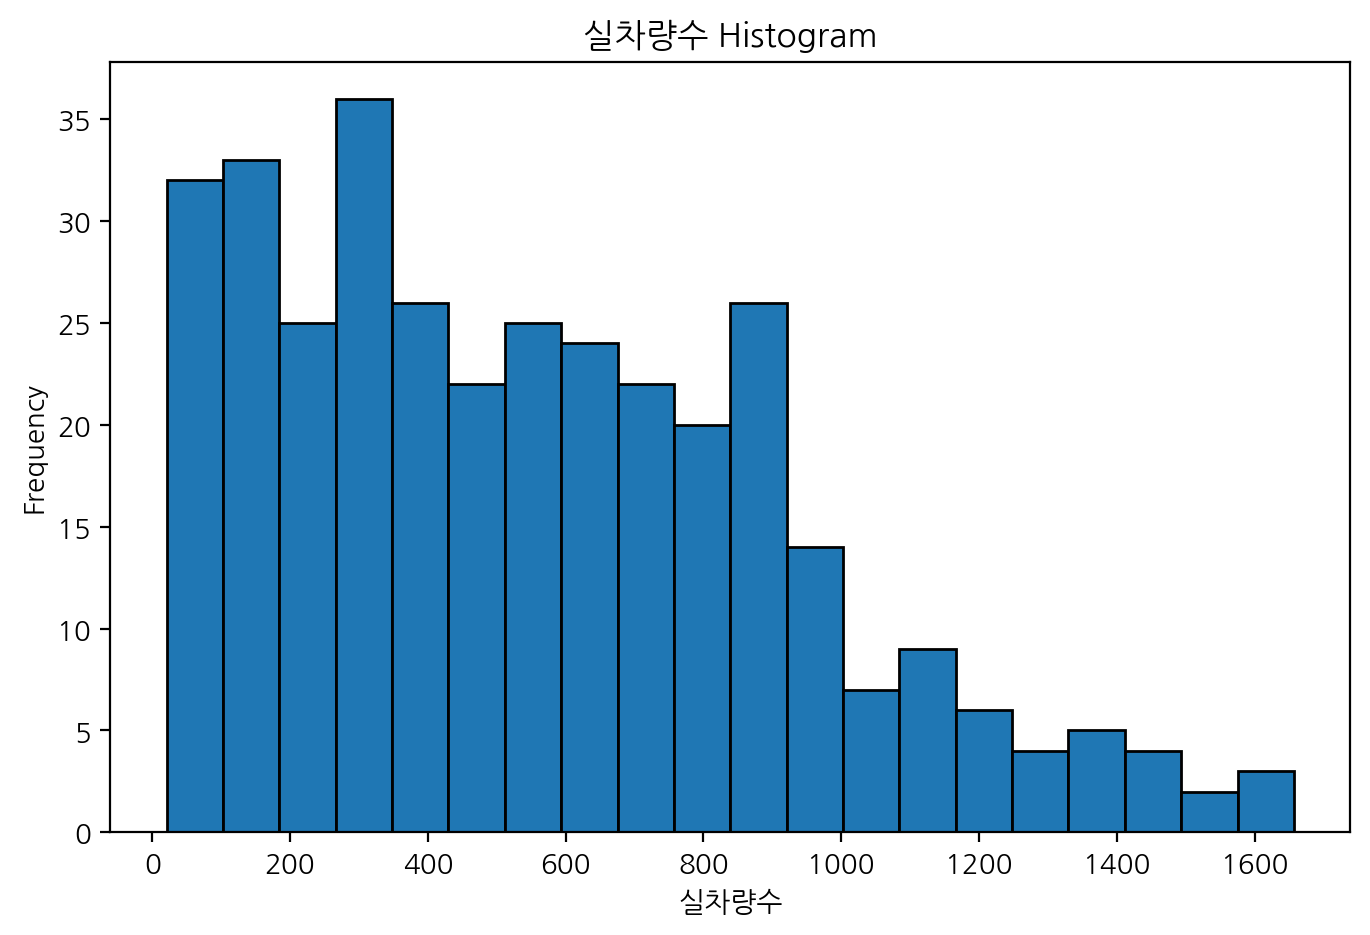

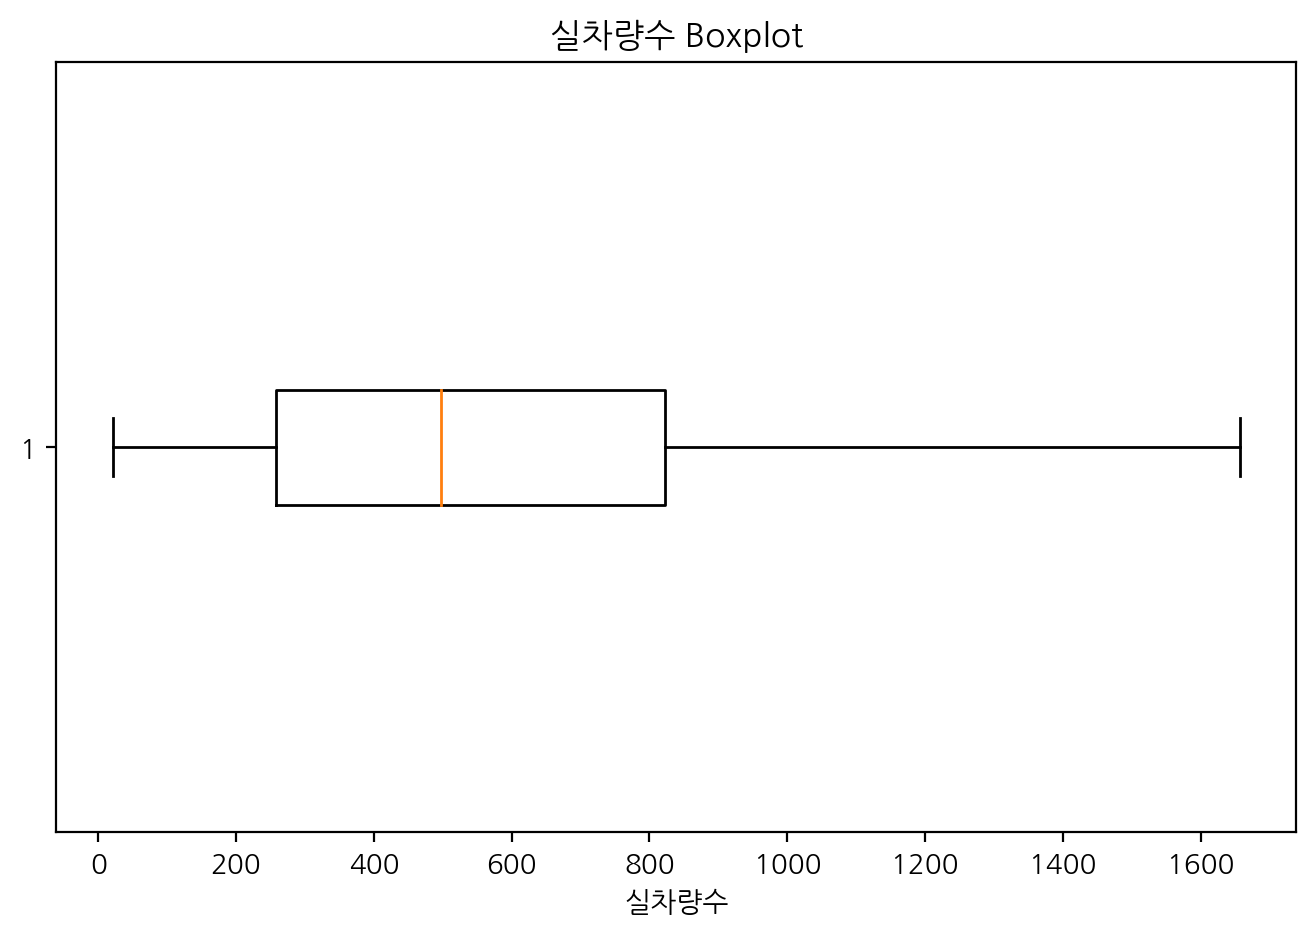

In [ ]:
continuous_vars = ['실차량수']

for var in continuous_vars:
    # 기술통계 확인
    display_statistics(apart, var)

    # 히스토그램 확인
    display_histogram(apart, var)

    # 박스플롯 확인
    display_boxplot(apart, var)

#### 2) 총세대수

--- 기술통계: 총세대수 ---
count     345.000000
mean      546.759420
std       432.359538
min         1.000000
25%       178.000000
50%       491.000000
75%       853.000000
max      2289.000000
Name: 총세대수, dtype: float64




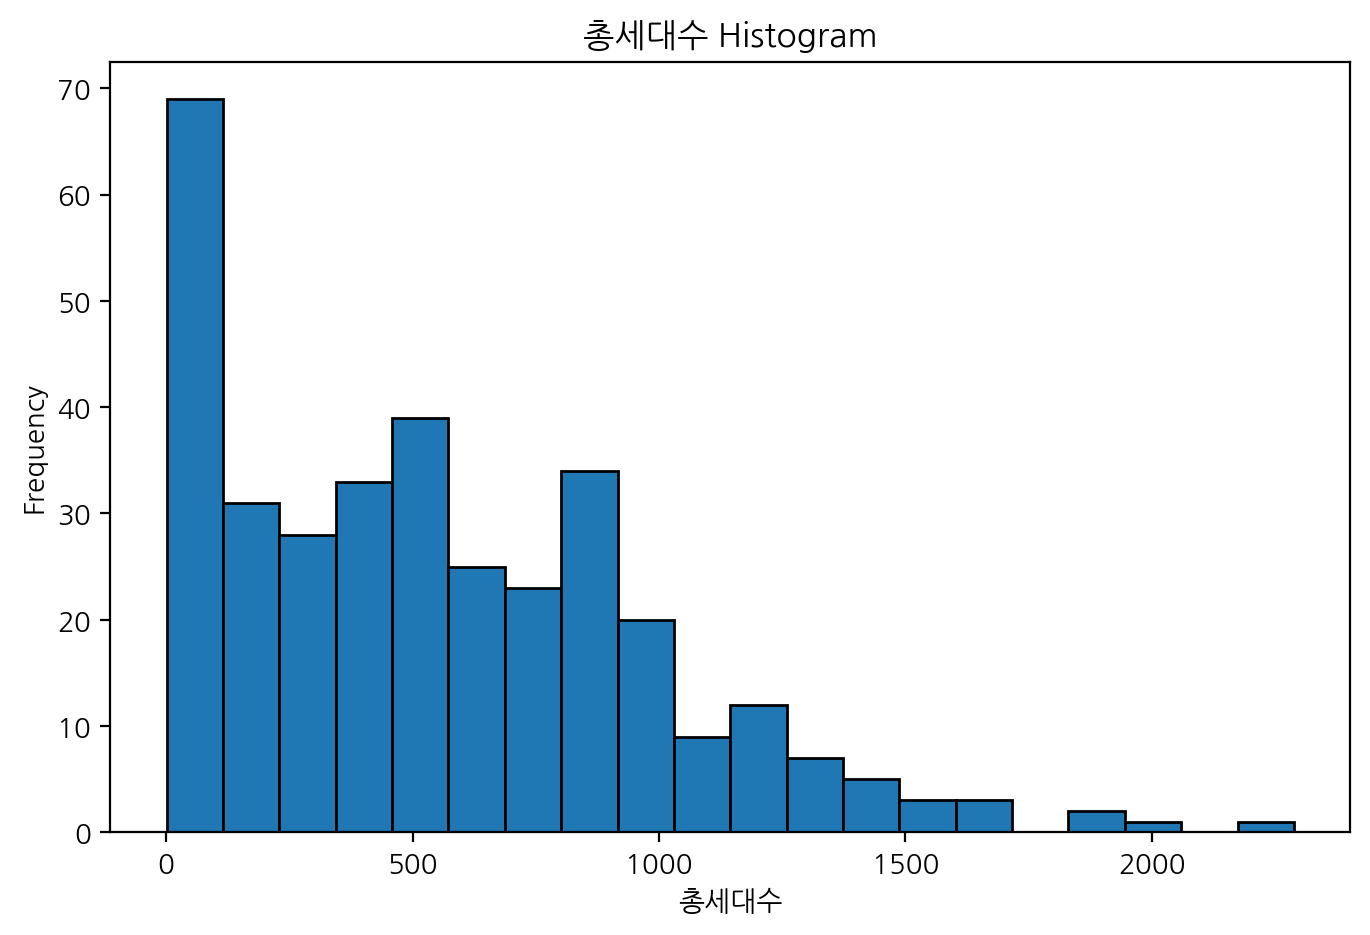

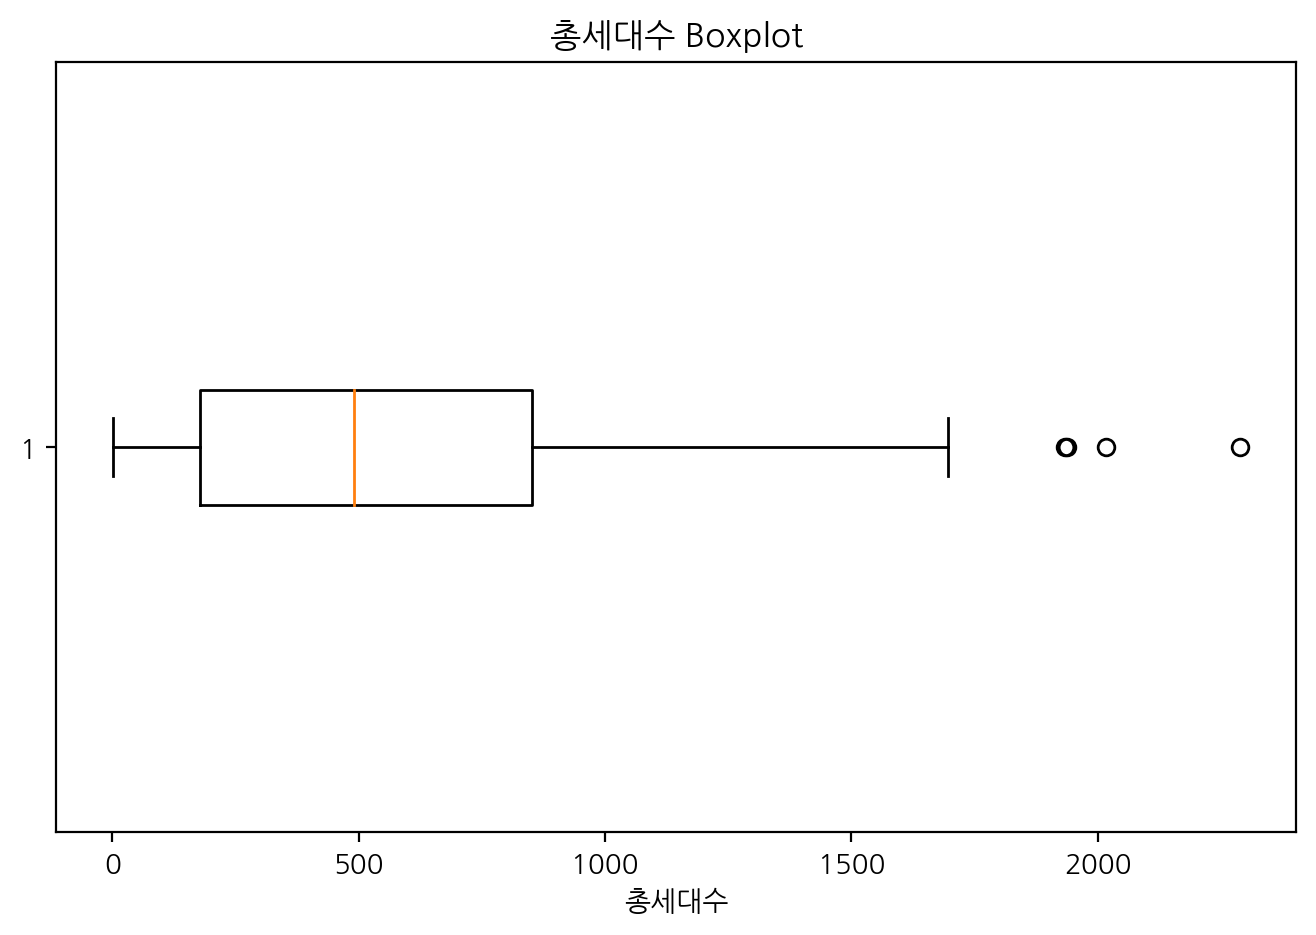

In [ ]:
continuous_vars = ['총세대수']

for var in continuous_vars:
    # 기술통계 확인
    display_statistics(apart, var)

    # 히스토그램 확인
    display_histogram(apart, var)

    # 박스플롯 확인
    display_boxplot(apart, var)

#### 3) 총면적

--- 기술통계: 총면적 ---
count       345.000000
mean      37280.347180
std       29586.633692
min          68.930000
25%       11293.832100
50%       32190.360000
75%       56189.979600
max      150126.863200
Name: 총면적, dtype: float64




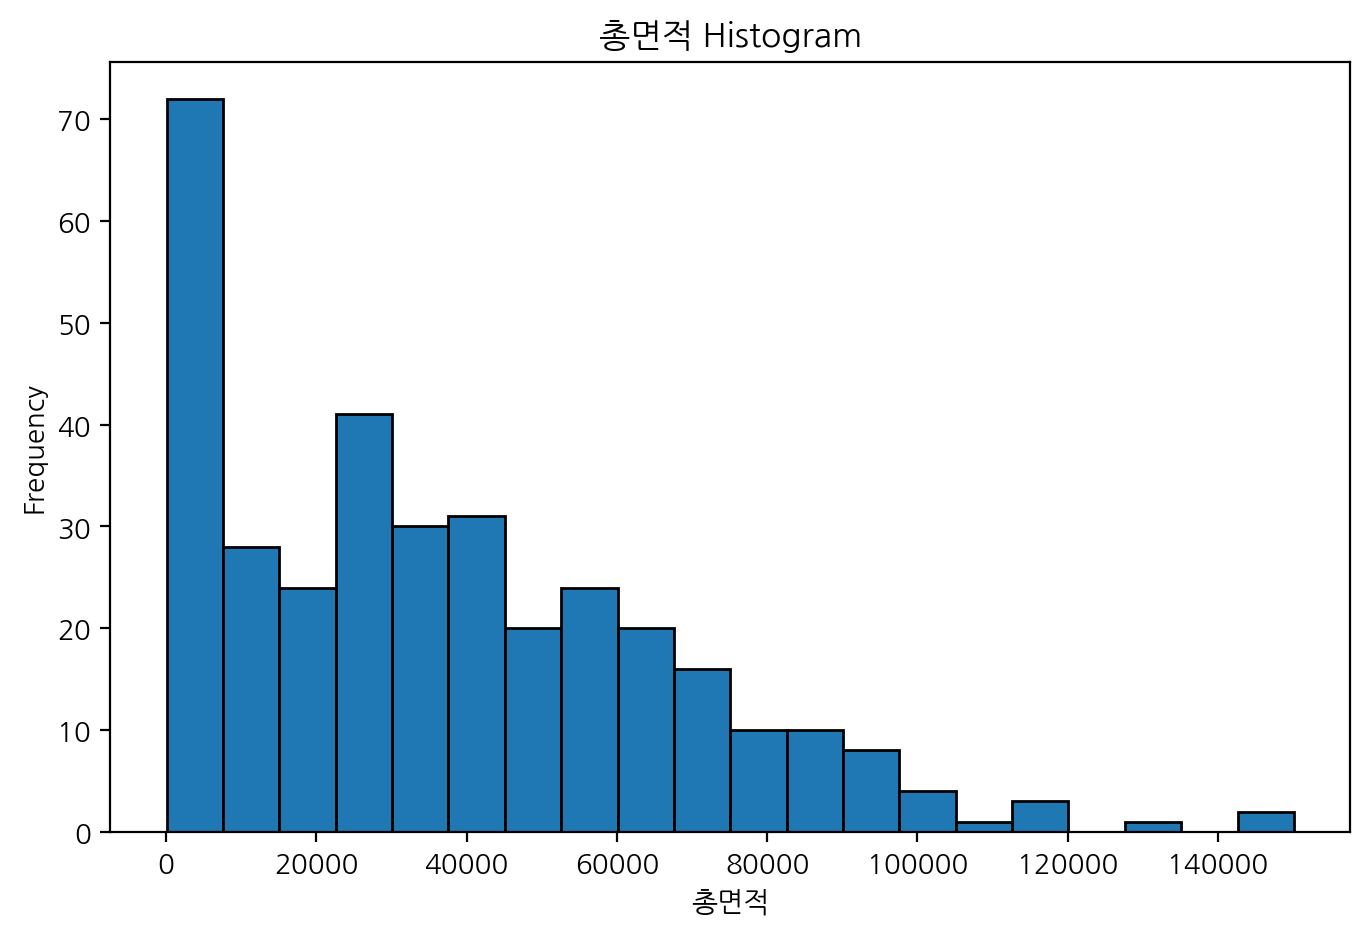

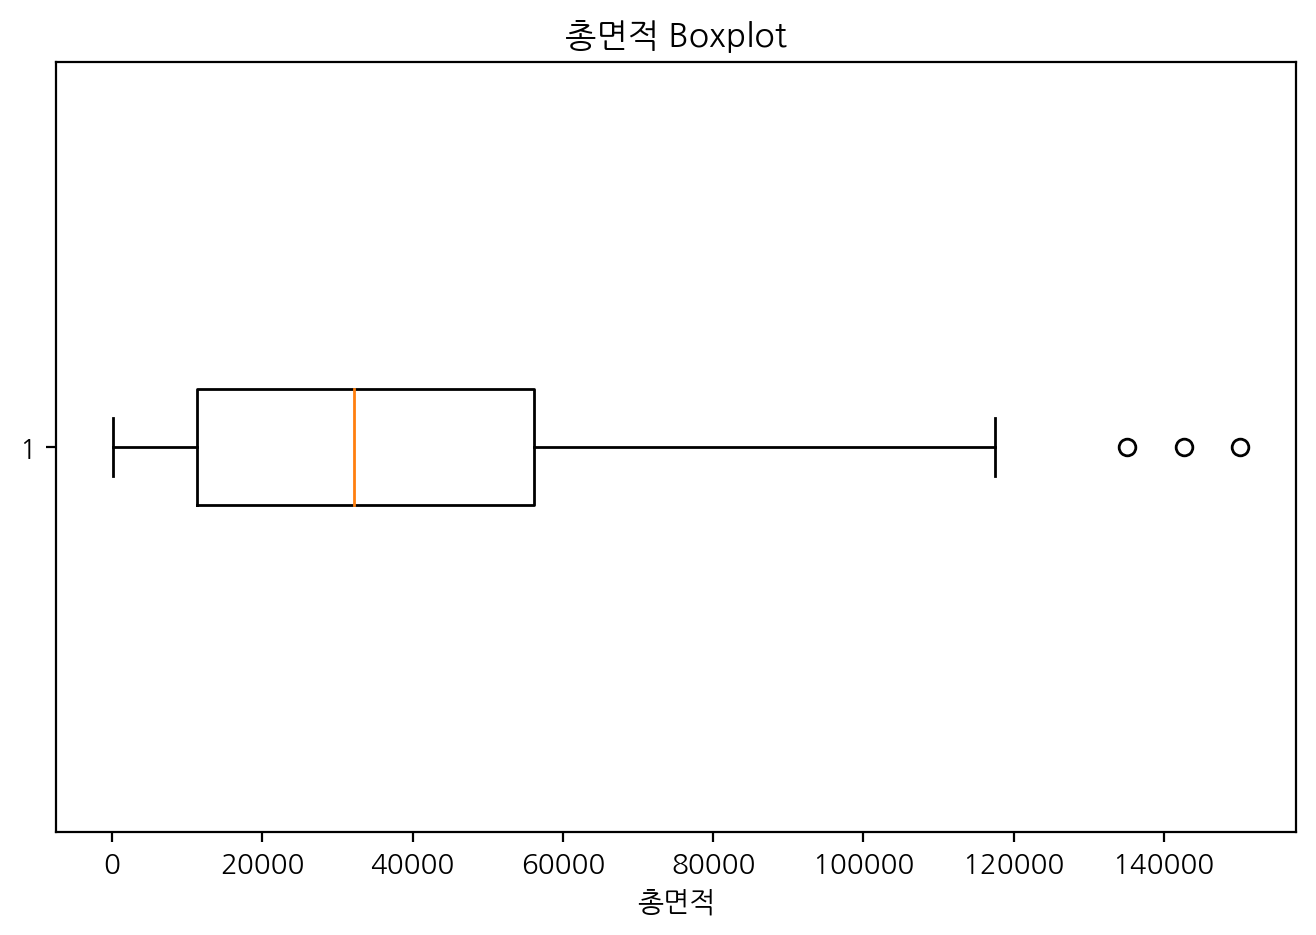

In [ ]:
continuous_vars = ['총면적']

for var in continuous_vars:
    # 기술통계 확인
    display_statistics(apart, var)

    # 히스토그램 확인
    display_histogram(apart, var)

    # 박스플롯 확인
    display_boxplot(apart, var)


#### 4) 준공연도

--- 기술통계: 준공연도 ---
count     345.000000
mean     2007.713043
std         7.261036
min      1992.000000
25%      2003.000000
50%      2008.000000
75%      2013.000000
max      2022.000000
Name: 준공연도, dtype: float64




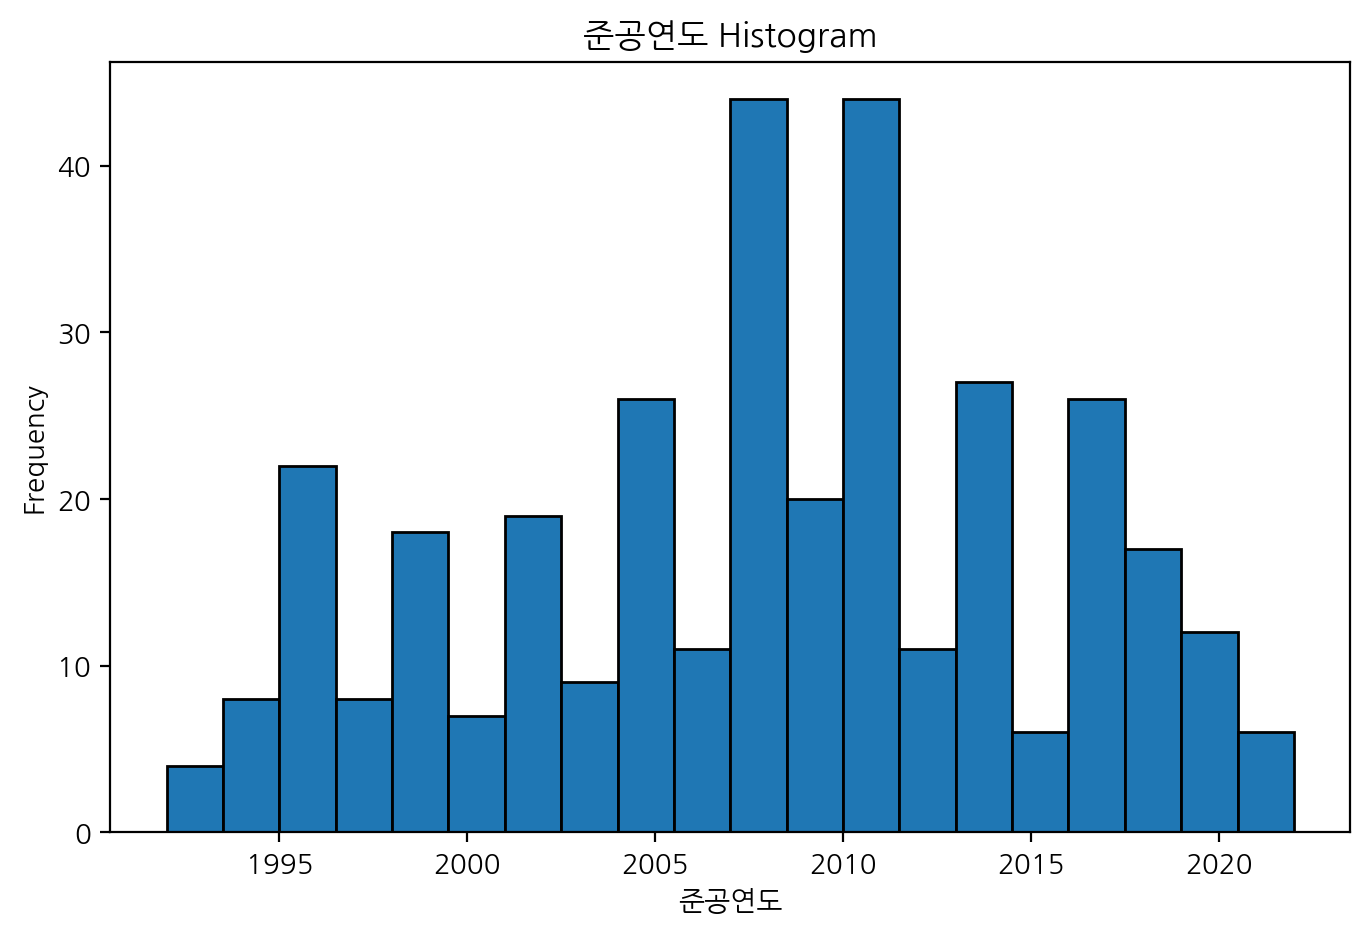

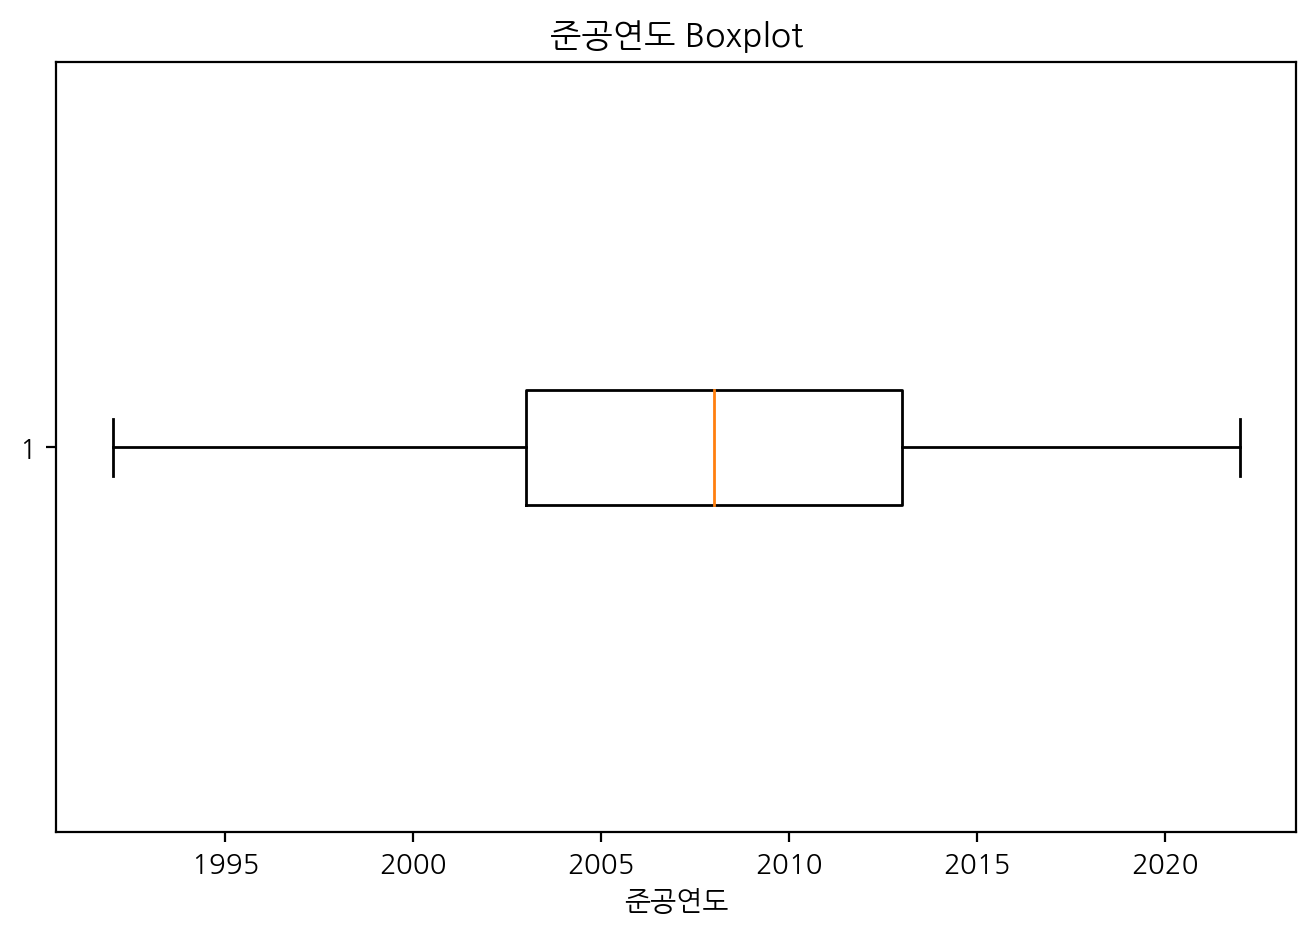

In [ ]:
continuous_vars = ['준공연도']

for var in continuous_vars:
    # 기술통계 확인
    display_statistics(apart, var)

    # 히스토그램 확인
    display_histogram(apart, var)

    # 박스플롯 확인
    display_boxplot(apart, var)


#### 5) 임대료

--- 기술통계: 임대료 ---
count       345.000000
mean     197742.246380
std      158753.807618
min           0.000000
25%      114255.000000
50%      172000.000000
75%      227564.000000
max      950305.000000
Name: 임대료, dtype: float64




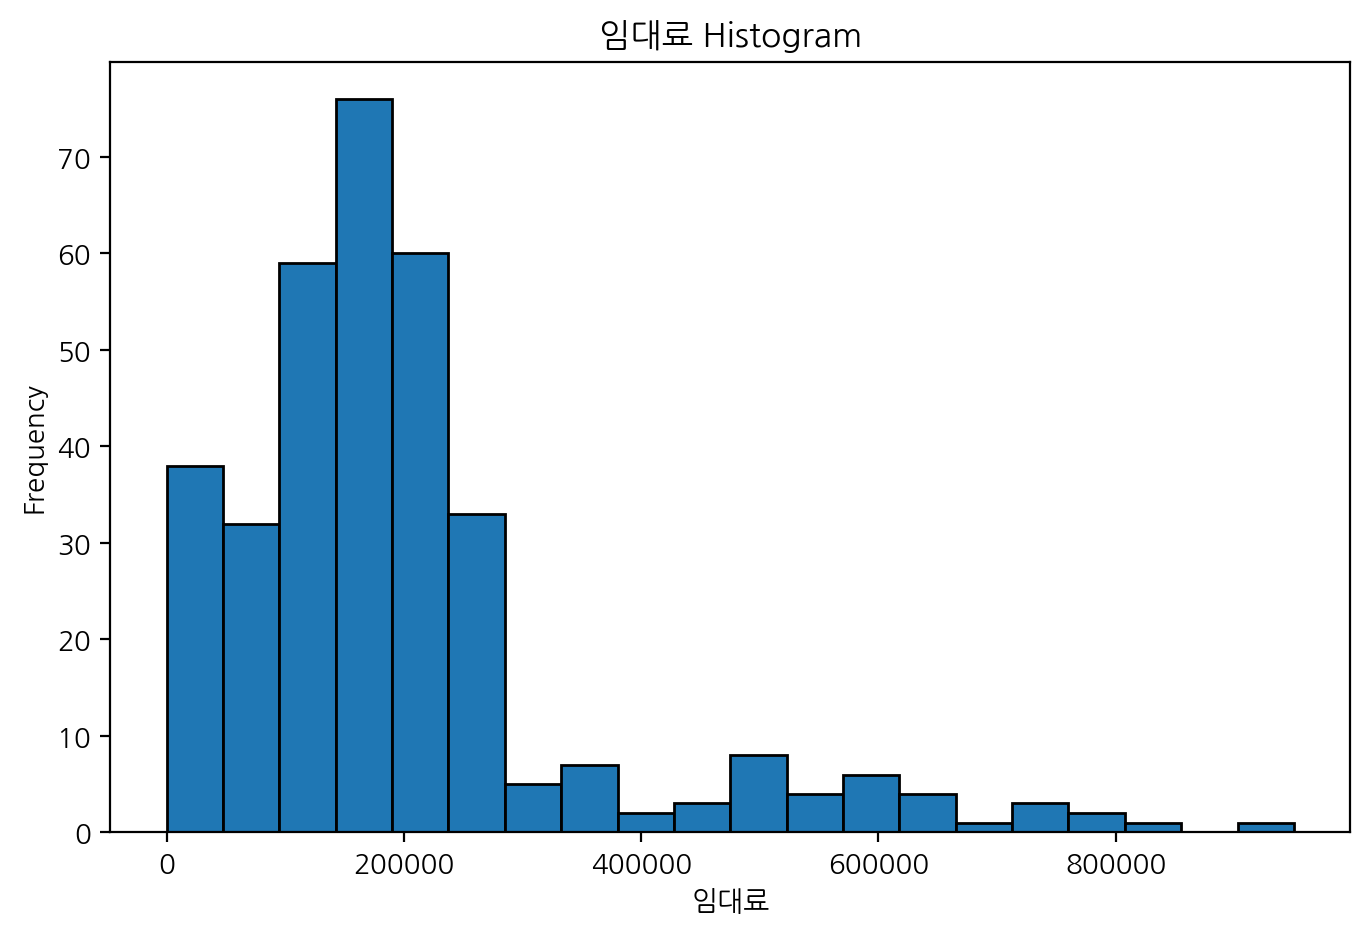

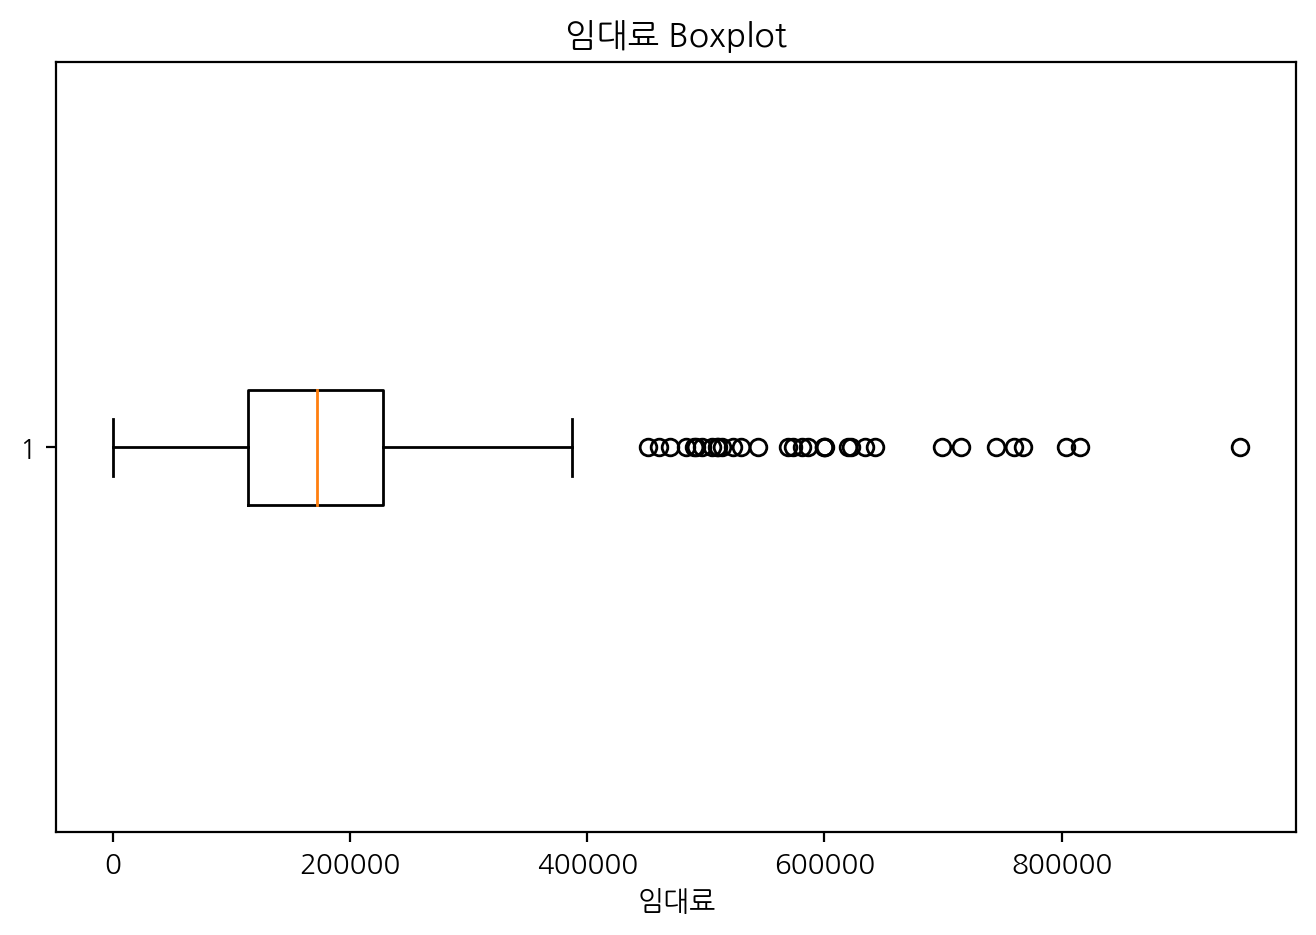

In [ ]:
continuous_vars = ['임대료']

for var in continuous_vars:
    # 기술통계 확인
    display_statistics(apart, var)

    # 히스토그램 확인
    display_histogram(apart, var)

    # 박스플롯 확인
    display_boxplot(apart, var)


#### 6) 임대보증금

--- 기술통계: 임대보증금 ---
count    3.450000e+02
mean     2.382832e+07
std      2.247414e+07
min      0.000000e+00
25%      1.272491e+07
50%      1.930850e+07
75%      2.837700e+07
max      1.898219e+08
Name: 임대보증금, dtype: float64




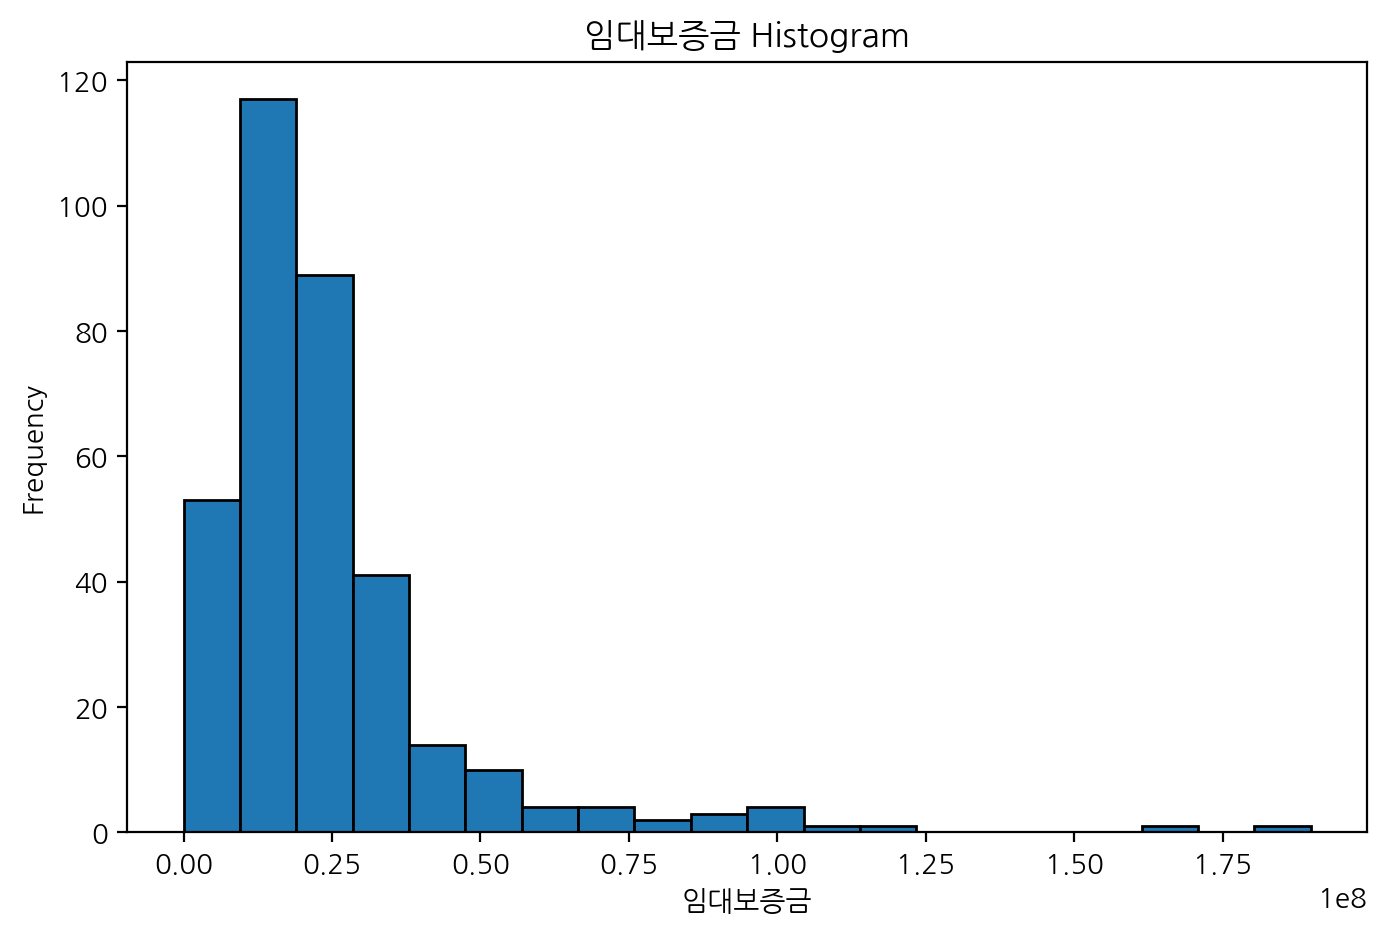

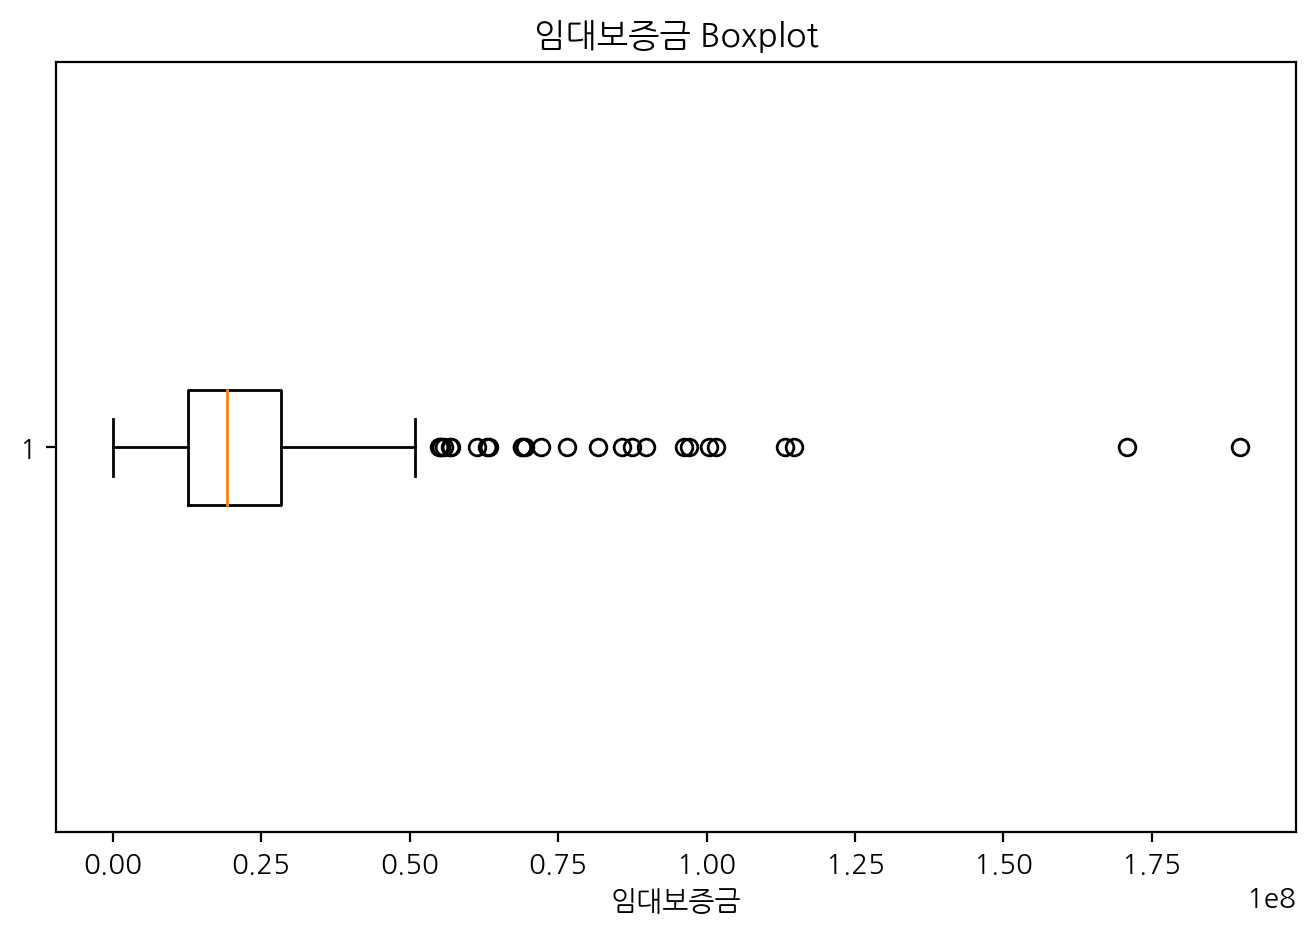

In [ ]:
continuous_vars = ['임대보증금']

for var in continuous_vars:
    # 기술통계 확인
    display_statistics(apart, var)

    # 히스토그램 확인
    display_histogram(apart, var)

    # 박스플롯 확인
    display_boxplot(apart, var)


### (2) 범주형 변수

- 대상: '지역', '건물형태', '난방방식', '승강기설치여부'
- sns.countplot() 함수 등을 사용해 데이터 분포를 확인합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [ ]:
# 함수 만들기
categorical_vars = ['지역', '건물형태', '난방방식', '승강기설치여부']

# 범주형 변수 시각화 함수
def display_countplot(data, var):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=var, palette='pastel', edgecolor='black')
    plt.title(f'{var} Countplot')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # x축 레이블 회전
    plt.show()

#### 1) 지역

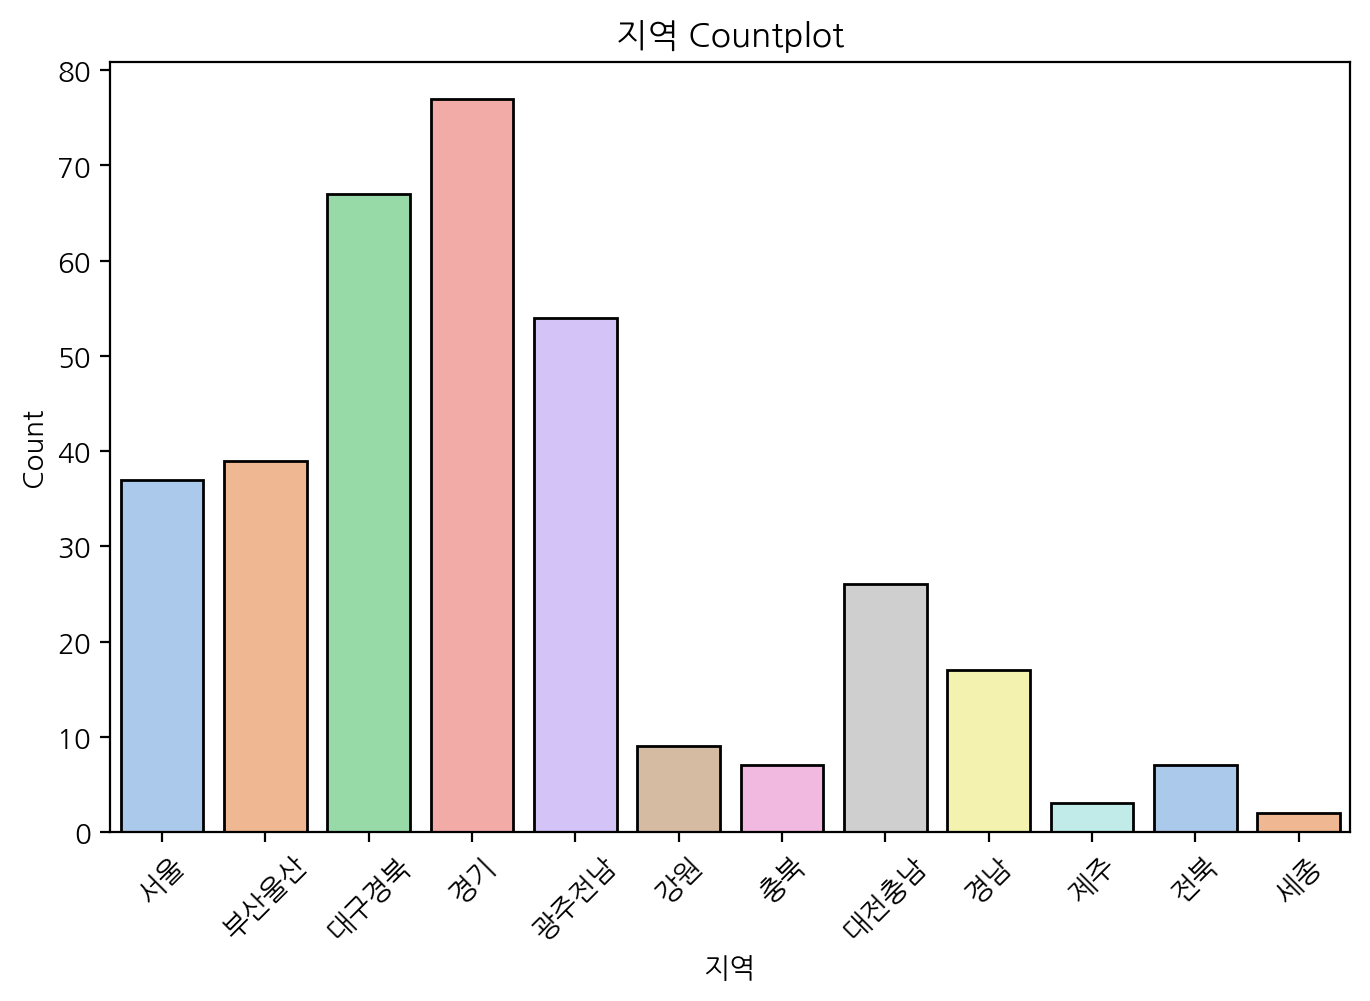

In [ ]:
categorical_vars = ['지역']

# 각 변수에 대해 함수 호출
for var in categorical_vars:
    display_countplot(apart, var)


#### 2) 건물형태

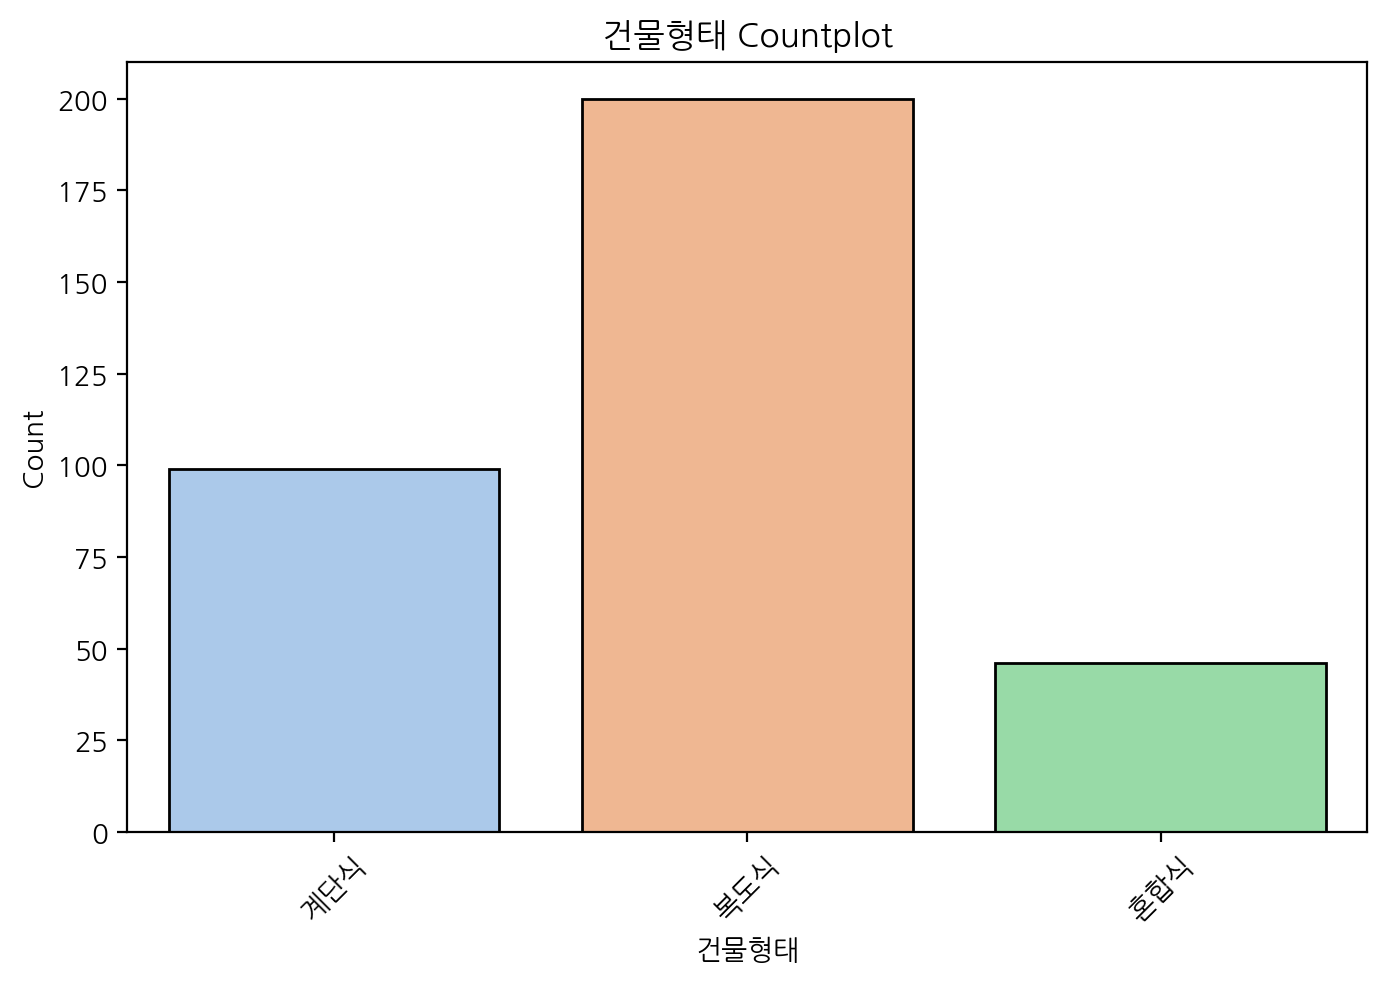

In [ ]:
categorical_vars = ['건물형태']

# 각 변수에 대해 함수 호출
for var in categorical_vars:
    display_countplot(apart, var)



#### 3) 난방방식

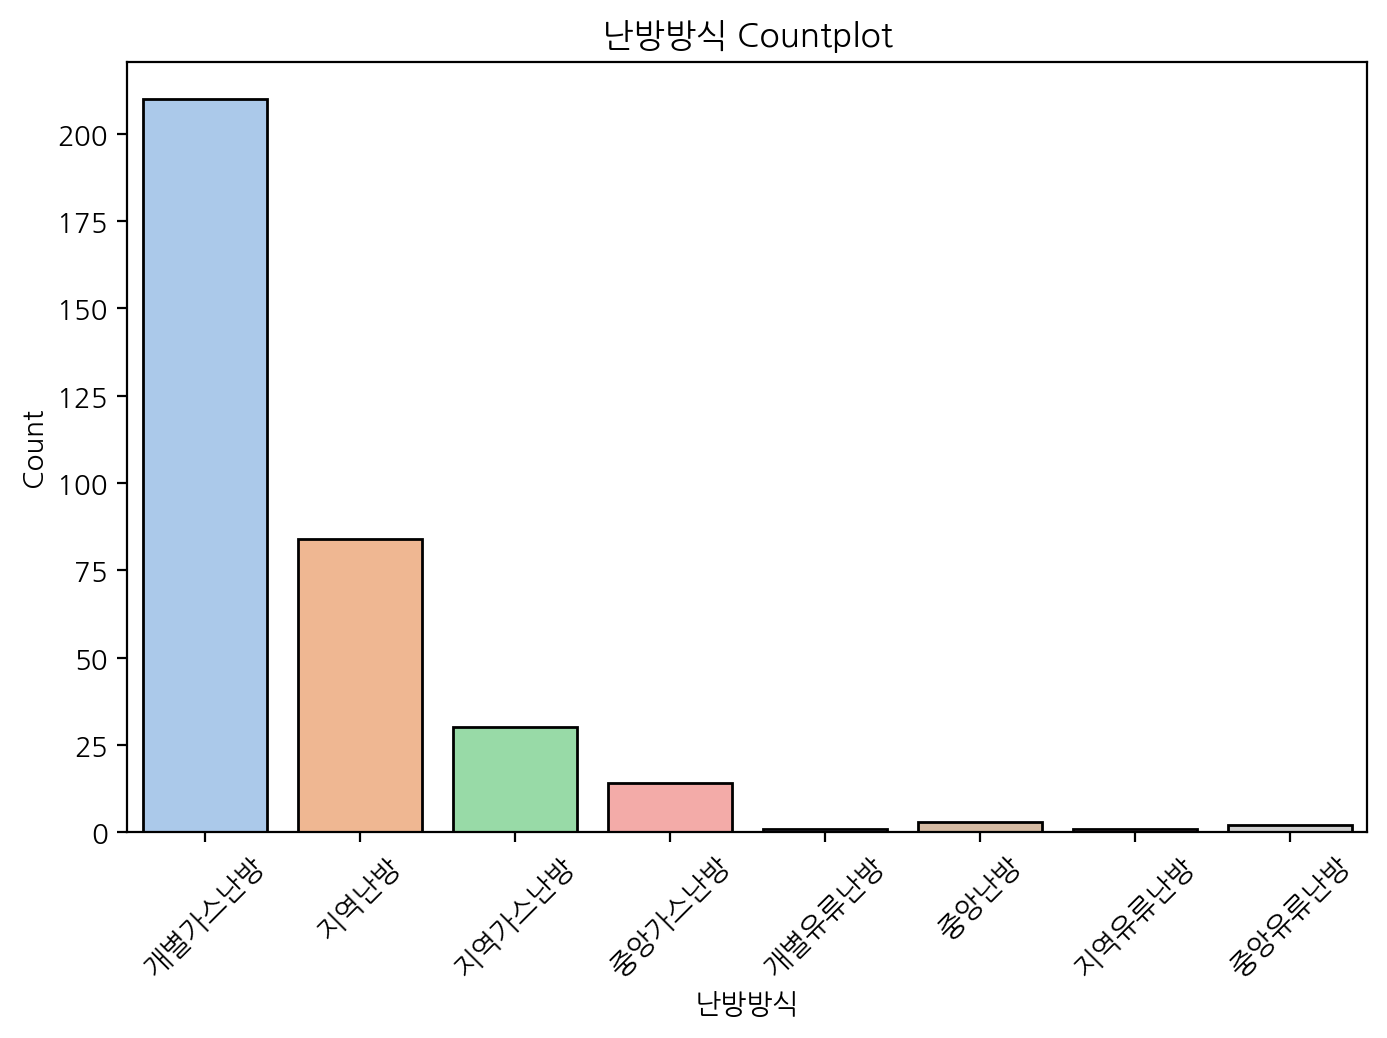

In [ ]:
categorical_vars = ['난방방식']

# 각 변수에 대해 함수 호출
for var in categorical_vars:
    display_countplot(apart, var)



#### 4) 승강기설치여부

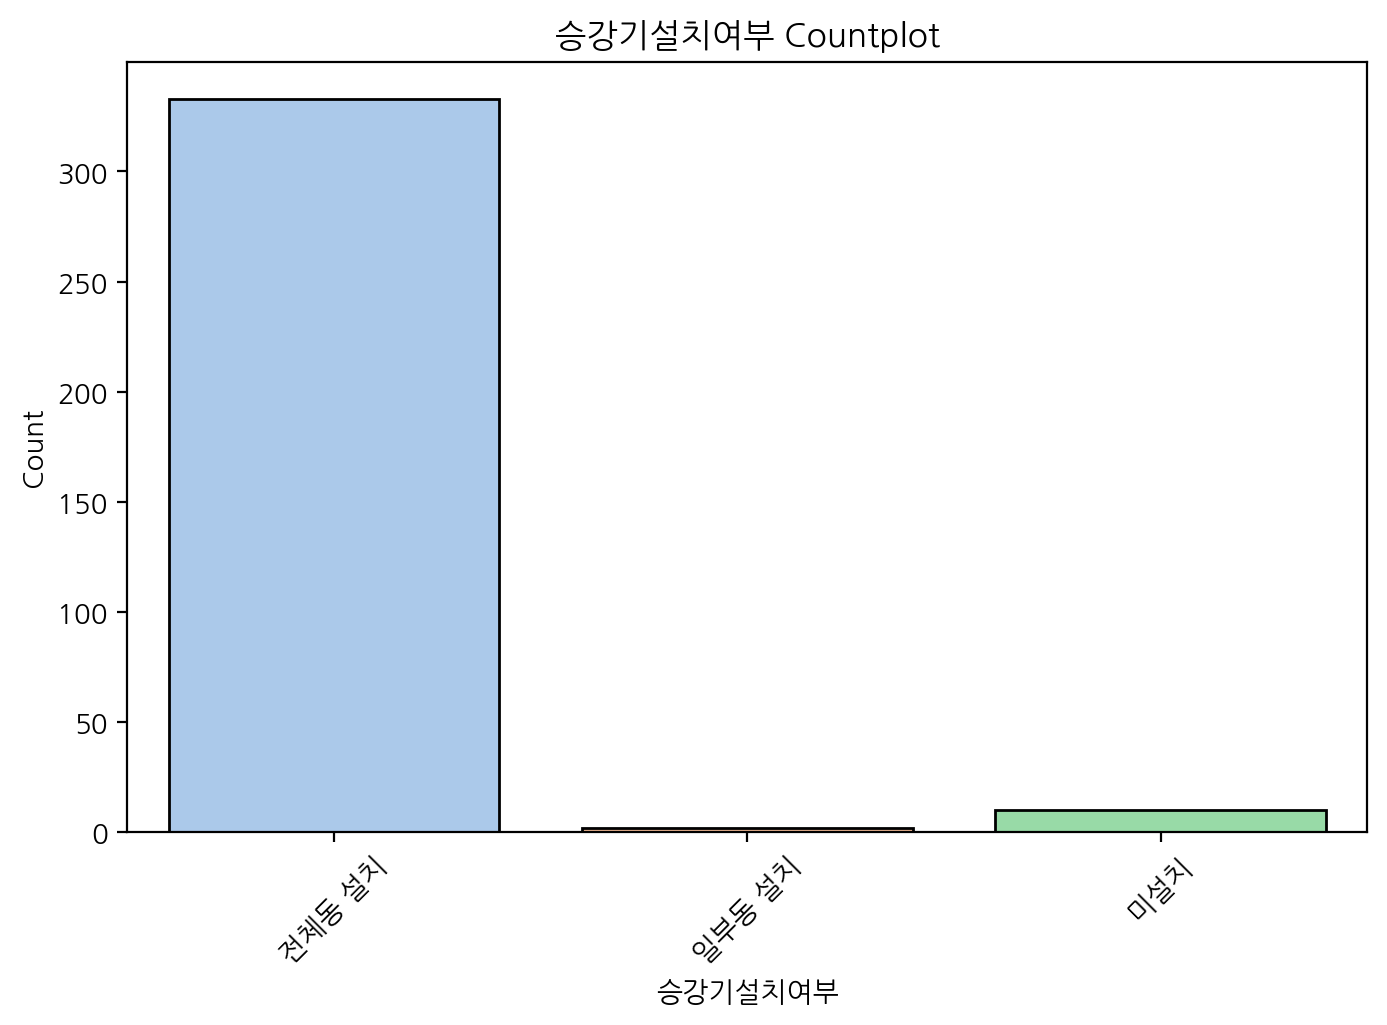

In [ ]:
categorical_vars = ['승강기설치여부']

# 각 변수에 대해 함수 호출
for var in categorical_vars:
    display_countplot(apart, var)



#### 5) 전용면적구간

- 전용면적구간은 pd.melt() 함수를 사용해 pivot을 해제하여 전용면적구간별 세대수를 분석합니다.

In [ ]:
apart.head()

,총세대수,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적10-30,면적30-40,면적40-50,면적50-60,면적60-70,면적70-80,면적80-200,임대보증금,임대료
0,78,2013,계단식,개별,1,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,35,2013,복도식,개별,1,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,88,2013,계단식,개별,1,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,477,2014,복도식,지역,1,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,15,2013,복도식,개별,1,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333


          총면적  총세대수  준공연도 건물형태 난방방식 승강기설치여부  실차량수         임대보증금  \
0   6023.7683    78  2013  계단식   개별       1   109  5.696200e+07   
1   1569.1668    35  2013  복도식   개별       1    35  6.306200e+07   
2   7180.1396    88  2013  계단식   개별       1    88  7.219000e+07   
3  47058.9273   477  2014  복도식   지역       1   943  1.015167e+08   
4    543.0268    15  2013  복도식   개별       1    21  5.522750e+07   

             임대료   전용면적구간  세대수  
0  642930.000000  면적10-30    0  
1  470100.000000  면적10-30   35  
2  586540.000000  면적10-30    0  
3  950305.000000  면적10-30    0  
4  340148.333333  면적10-30   15  


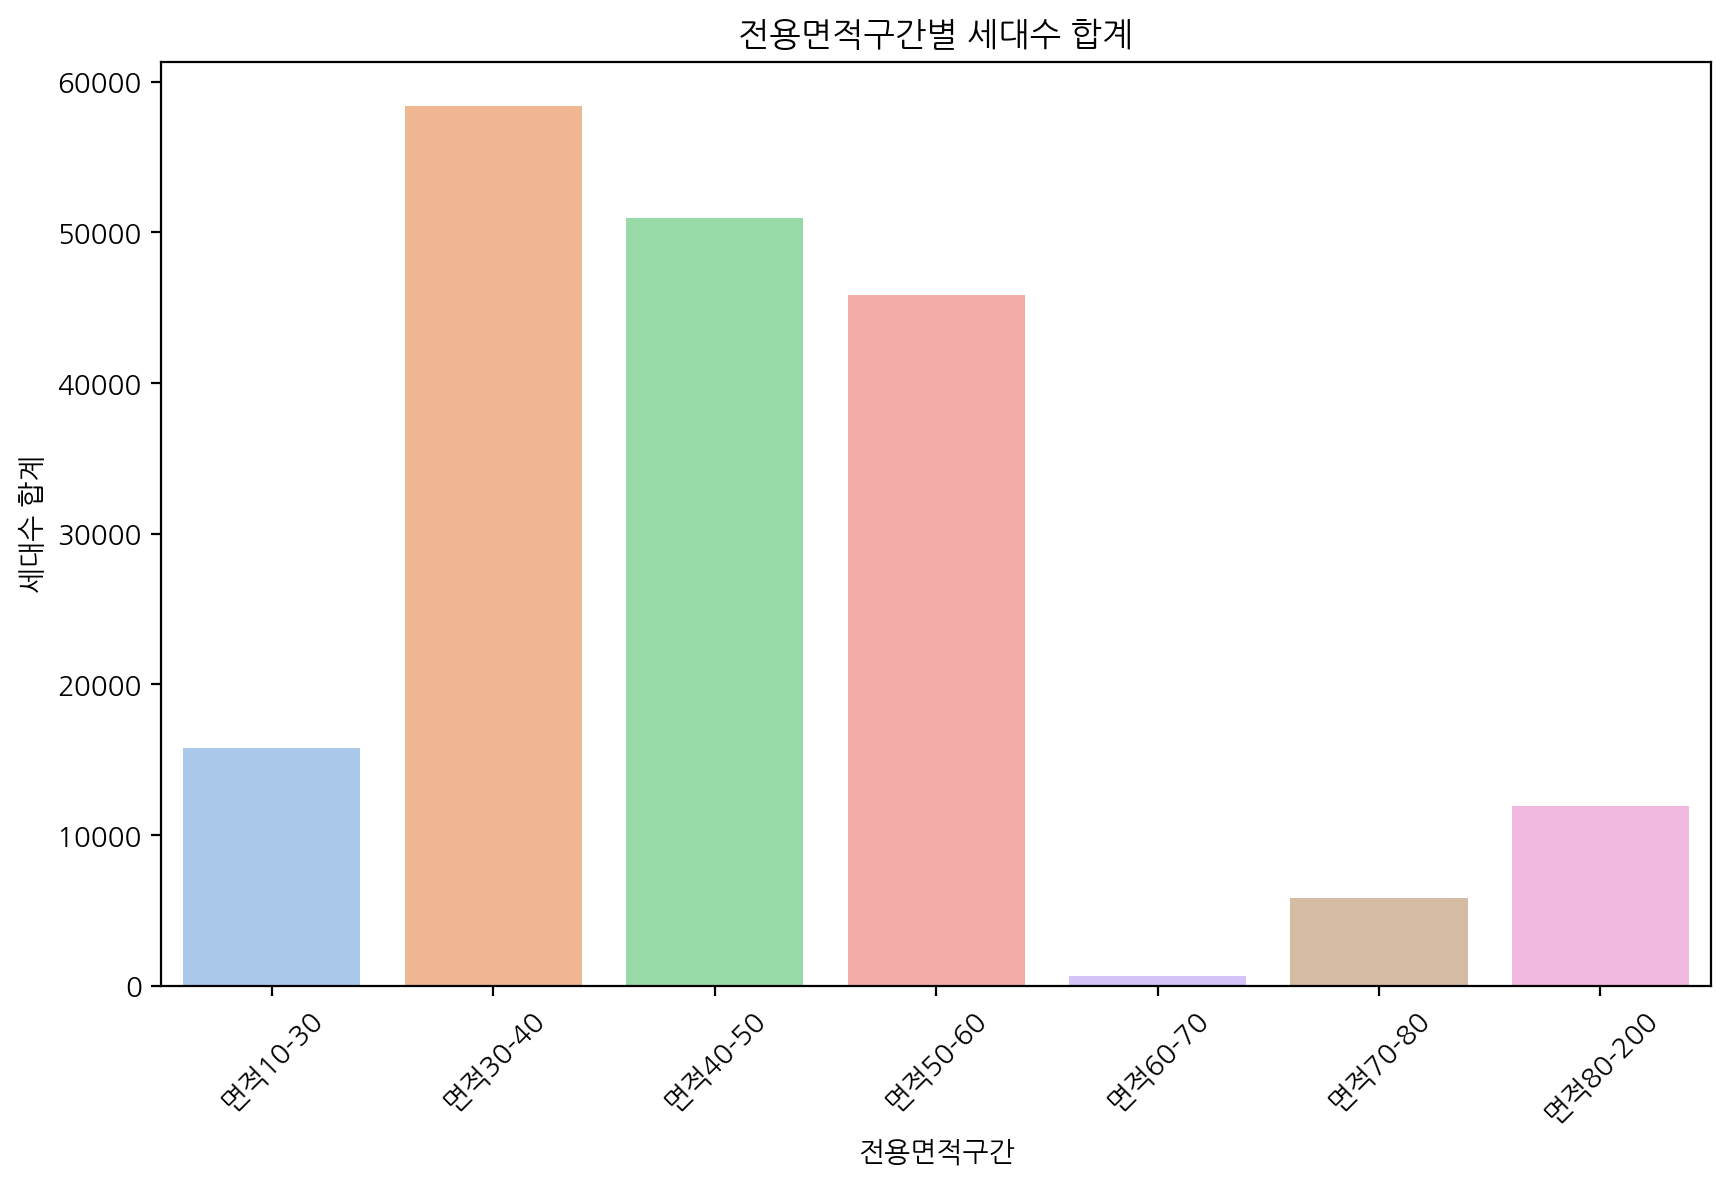

In [ ]:
# pd.melt() 함수로 전용면적구간을 긴 형식으로 변환
df_melted = pd.melt(apart,id_vars=['총면적','총세대수','준공연도','건물형태','난방방식','승강기설치여부','실차량수','임대보증금','임대료'],var_name='전용면적구간',value_name='세대수',ignore_index=False)

# '세대수' 열의 값을 숫자로 변환, 오류는 NaN으로 처리
df_melted['세대수'] = pd.to_numeric(df_melted['세대수'], errors='coerce')

# 결과 확인
print(df_melted.head())

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='전용면적구간', y='세대수', estimator=sum, ci=None, palette="pastel")
plt.title('전용면적구간별 세대수 합계')
plt.xlabel('전용면적구간')
plt.ylabel('세대수 합계')
plt.xticks(rotation=45)
plt.show()

## 4. 이변량 분석

- 숫자형 변수들 간의 상관관계를 분석합니다.
- 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
- 볌주형 변수 → 실차량수 관계를 분석합니다.

In [ ]:
apart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      345 non-null    object 
 1   총세대수      345 non-null    int64  
 2   지역        345 non-null    object 
 3   준공연도      345 non-null    int64  
 4   건물형태      345 non-null    object 
 5   난방방식      345 non-null    object 
 6   승강기설치여부   345 non-null    object 
 7   실차량수      345 non-null    int64  
 8   총면적       345 non-null    float64
 9   면적10-30   345 non-null    int64  
 10  면적30-40   345 non-null    int64  
 11  면적40-50   345 non-null    int64  
 12  면적50-60   345 non-null    int64  
 13  면적60-70   345 non-null    int64  
 14  면적70-80   345 non-null    int64  
 15  면적80-200  345 non-null    int64  
 16  임대보증금     345 non-null    float64
 17  임대료       345 non-null    float64
dtypes: float64(3), int64(10), object(5)
memory usage: 48.6+ KB


### (1) 숫자형 변수들 간의 상관관계

- 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
- 숫자형 변수들 간의 상관관계를 df.corr() 메서드와 sns.heatmap() 함수 등을 사용해 시각화 합니다.

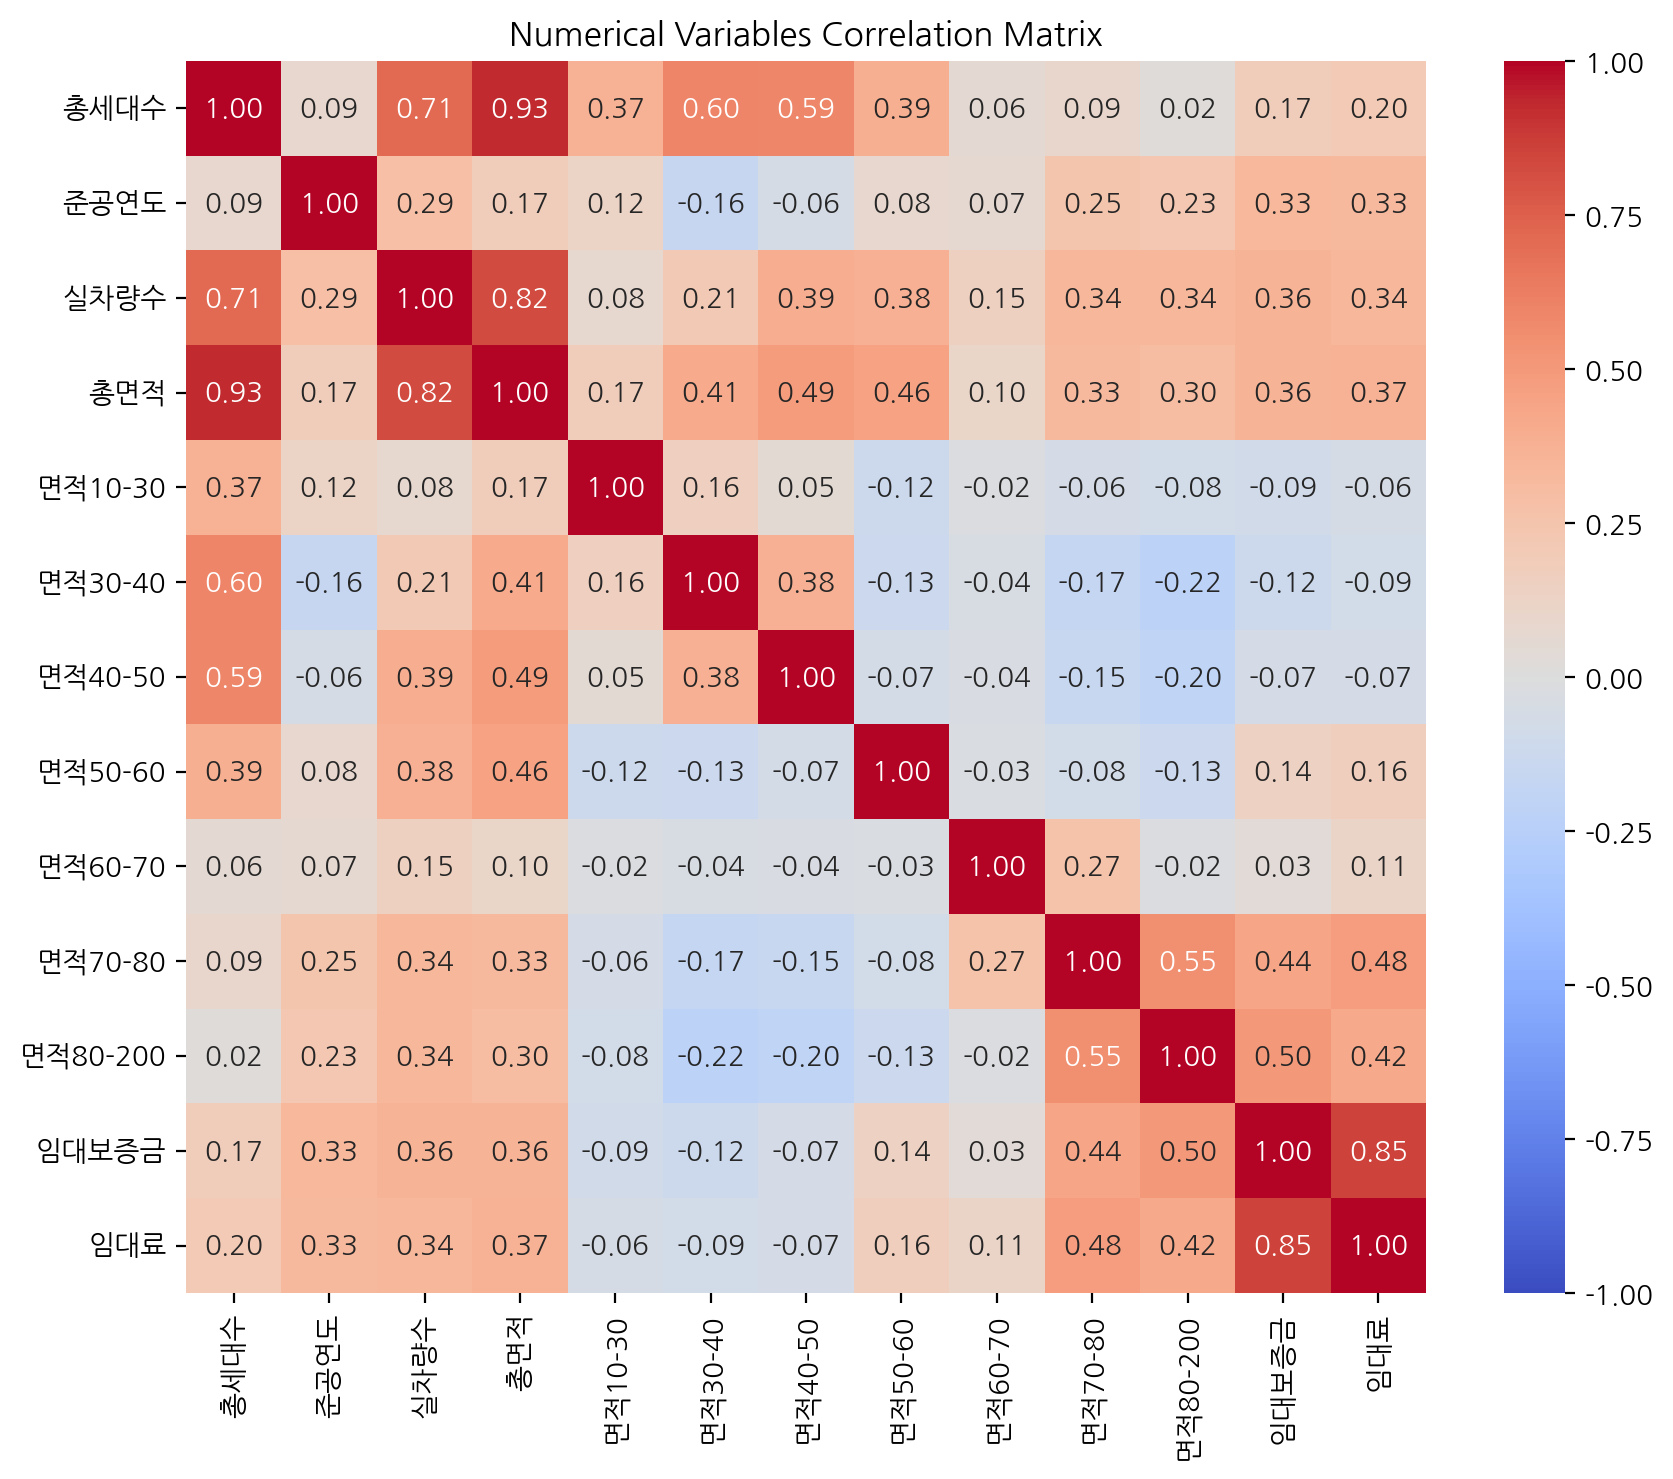

In [ ]:
# 숫자형 변수만 선택하여 상관관계 분석
numeric_columns = apart.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = apart[numeric_columns].corr()

# 상관관계 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", cbar=True)
plt.title('Numerical Variables Correlation Matrix')
plt.show()


### (2) 숫자형 변수 → 실차량수

- 상관계수가 높은 상위 3~5개 숫자형 변수와 실차량수 관계를 산점도를 시각화해 분석합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [ ]:
# 함수 만들기
def plot_correlation(data, target_var, target):
    # 숫자형 변수들만 선택하여 상관계수 계산
    numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
    correlation_matrix = data[numeric_columns].corr()

    # target 변수와 target_var 간의 상관계수 확인 및 산점도 그리기
    correlation_value = correlation_matrix[target_var][target]
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data, x=target, y=target_var, alpha=0.6)
    plt.title(f'{target_var} vs {target} (Correlation: {correlation_value:.2f})')
    plt.xlabel(target)
    plt.ylabel(target_var)
    plt.show()

#### 1) 변수이름

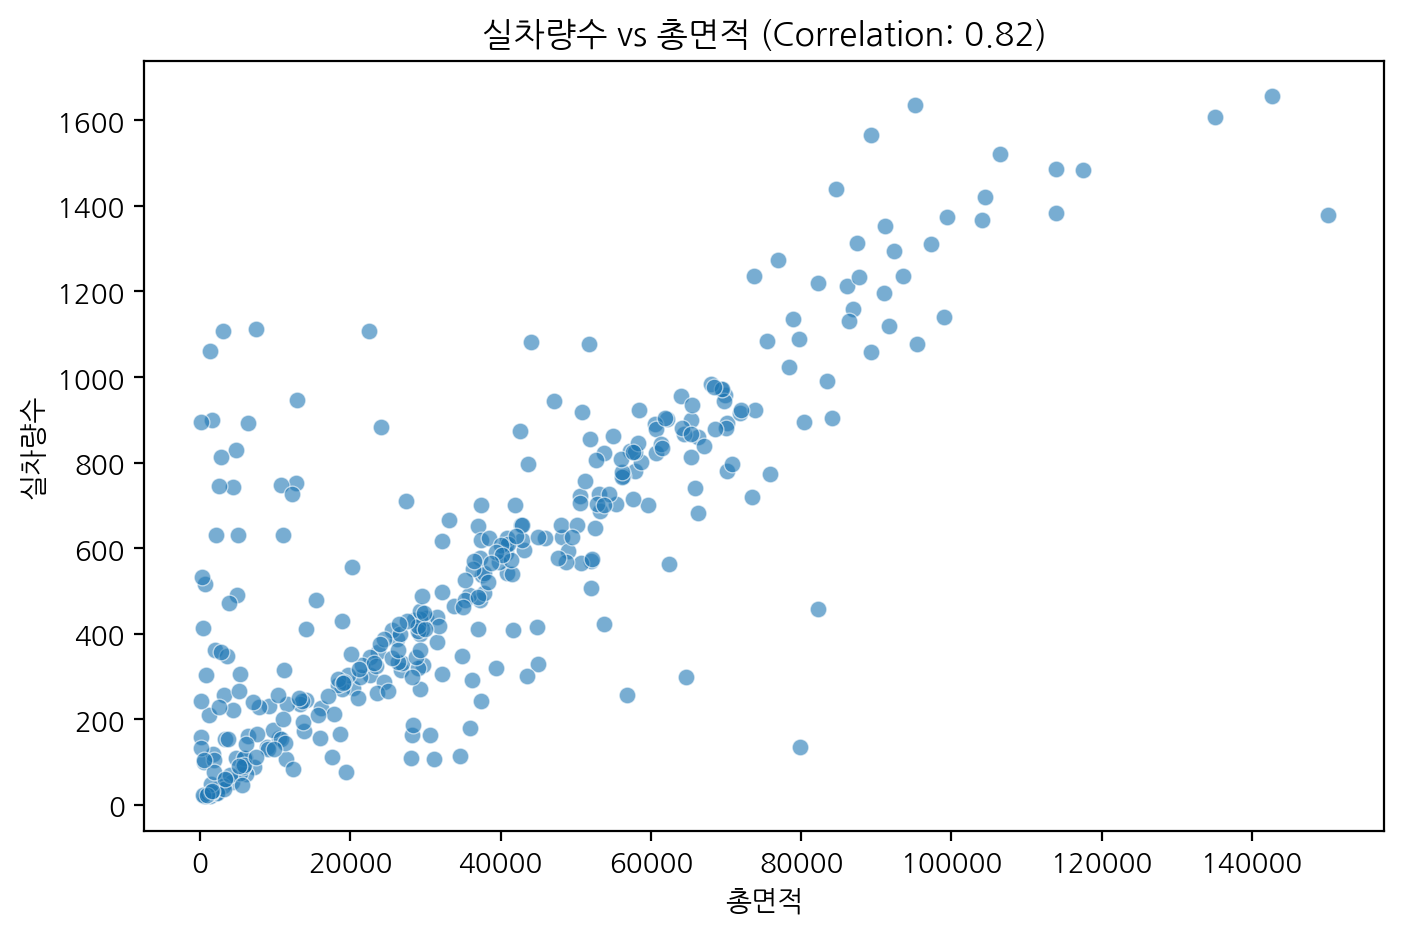

In [ ]:
# 함수 호출: 실차량수와 상관계수가 높은 상위 5개 변수에 대해 산점도 시각화
plot_correlation(apart, target_var='실차량수', target = '총면적')


#### 2) 변수이름

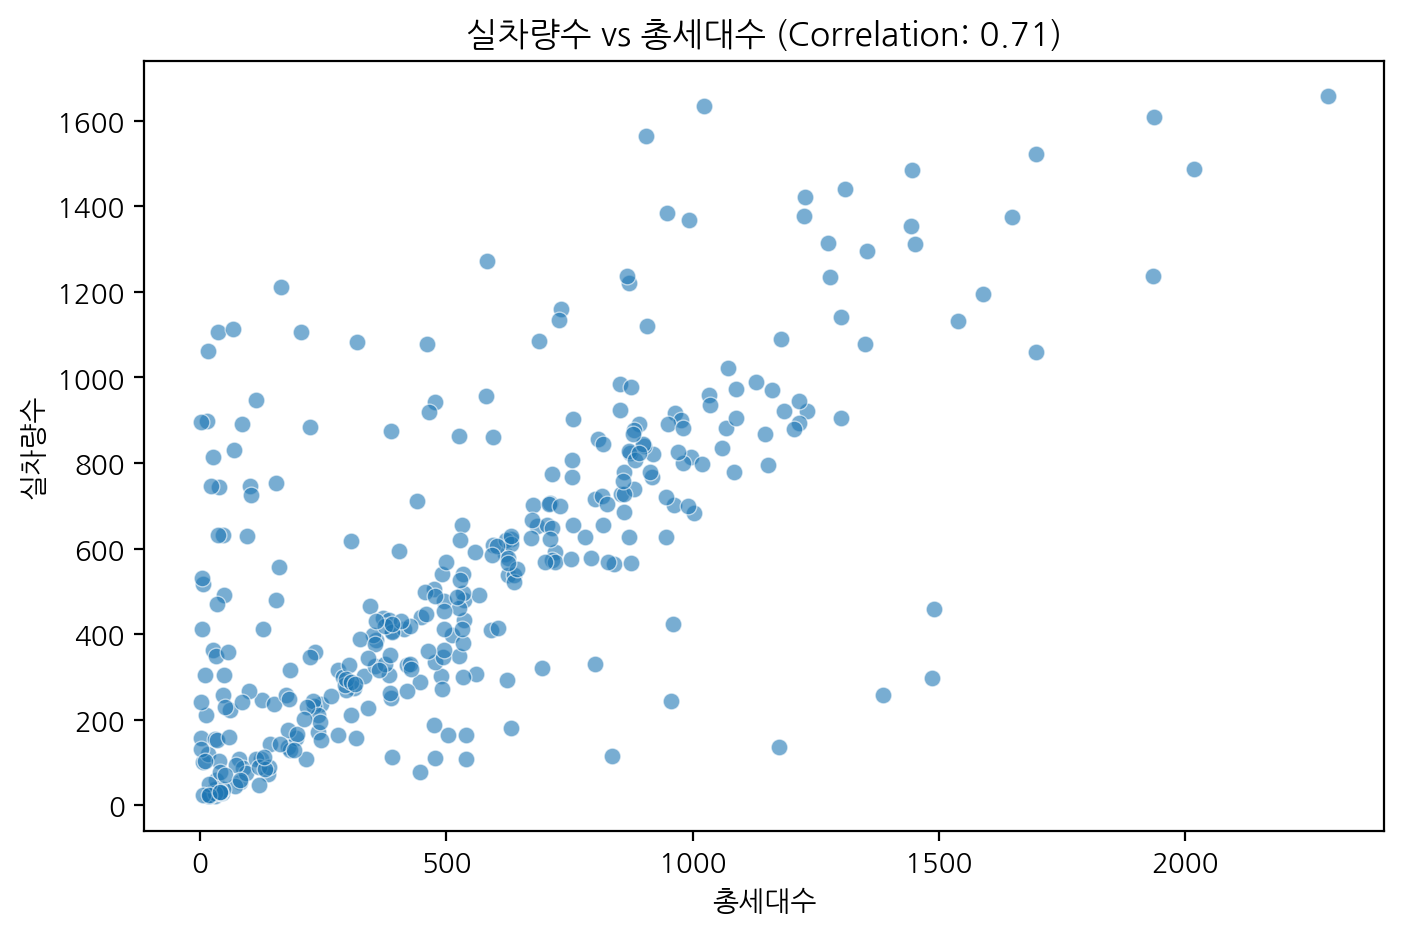

In [ ]:
# 함수 호출: 실차량수와 상관계수가 높은 상위 5개 변수에 대해 산점도 시각화
plot_correlation(apart, target_var='실차량수', target = '총세대수')


#### 3) 변수이름

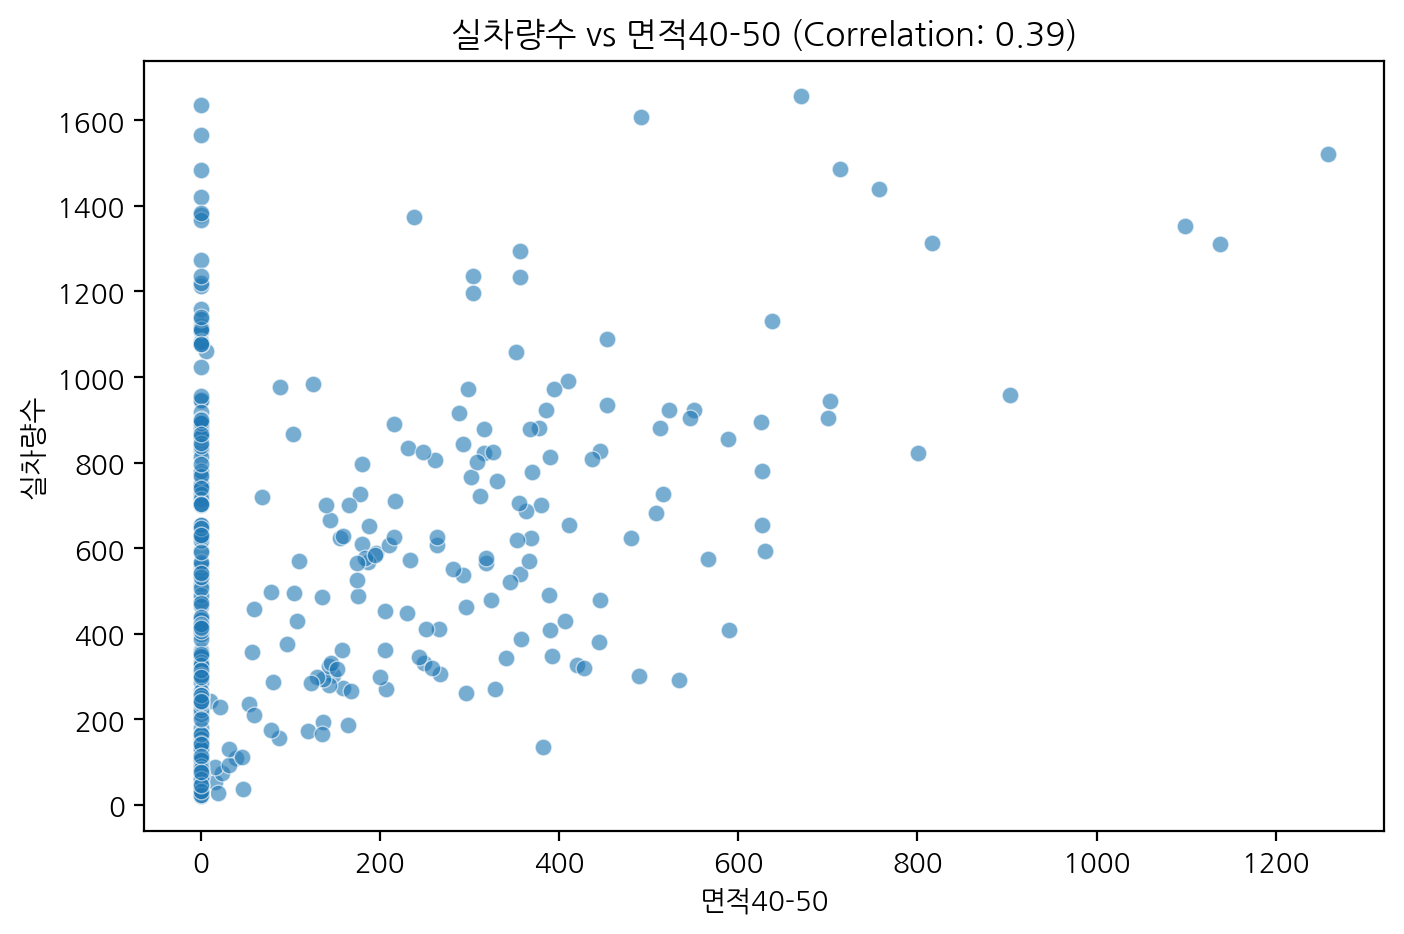

In [ ]:
# 함수 호출: 실차량수와 상관계수가 높은 상위 5개 변수에 대해 산점도 시각화
plot_correlation(apart, target_var='실차량수', target = '면적40-50')


#### 4) 변수이름

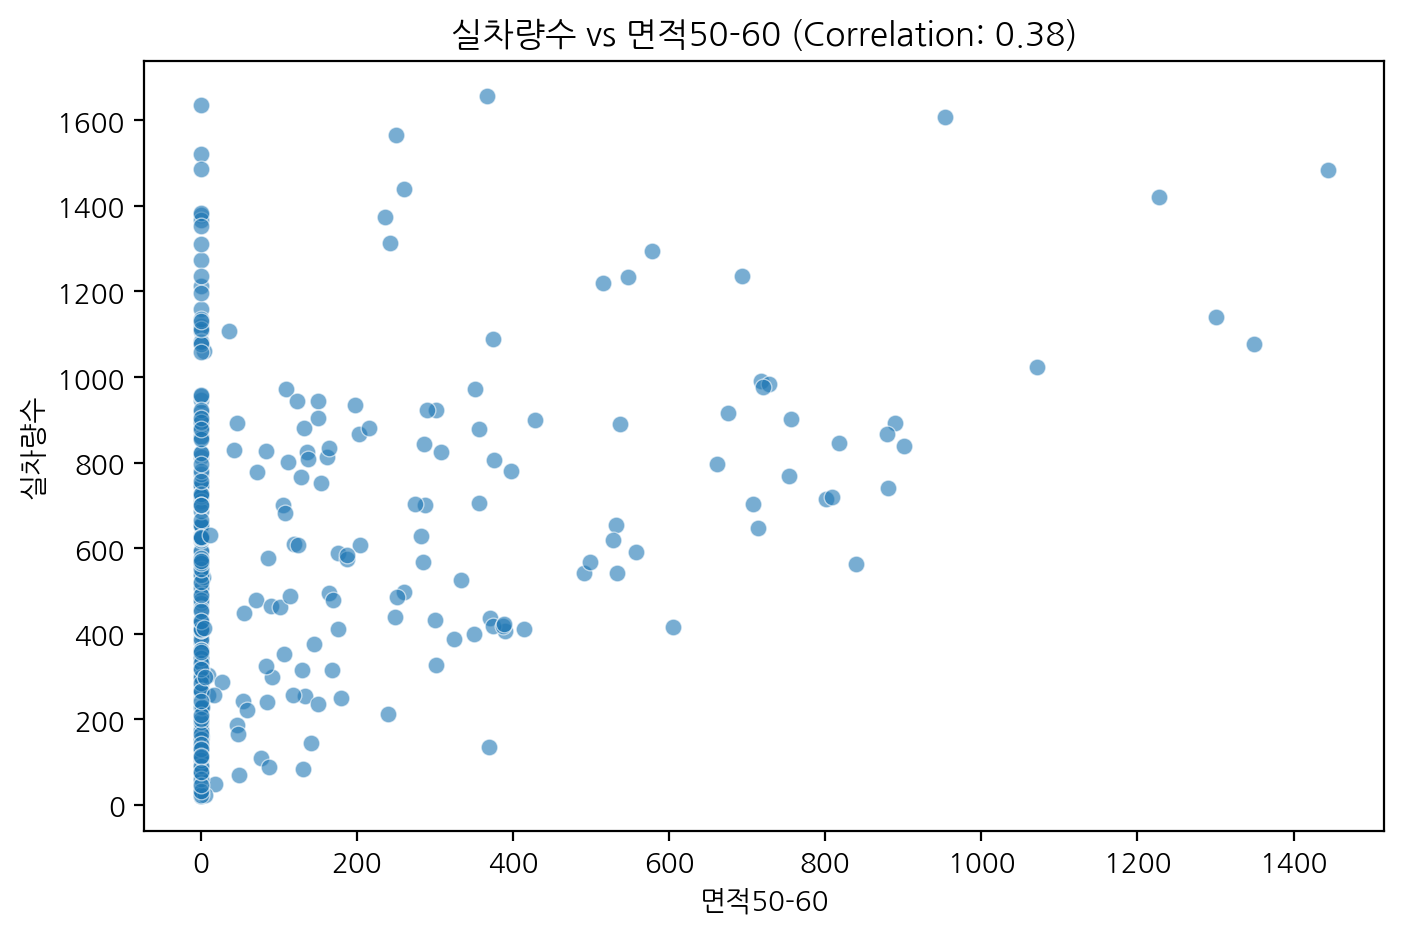

In [ ]:
# 함수 호출: 실차량수와 상관계수가 높은 상위 5개 변수에 대해 산점도 시각화
plot_correlation(apart, target_var='실차량수', target = '면적50-60')


#### 5) 변수이름

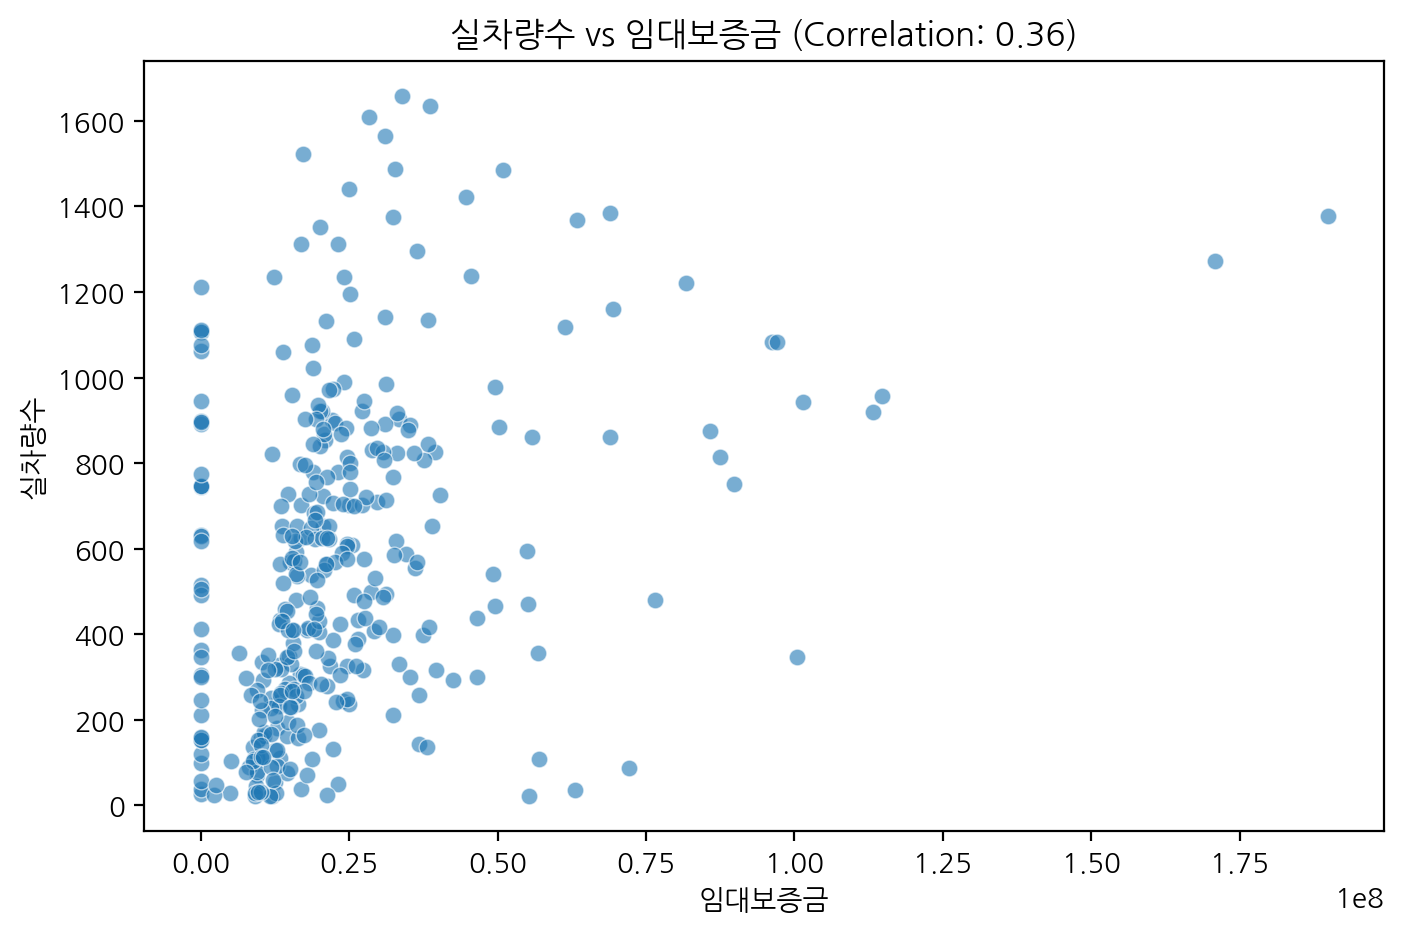

In [ ]:
# 함수 호출: 실차량수와 상관계수가 높은 상위 5개 변수에 대해 산점도 시각화
plot_correlation(apart, target_var='실차량수', target = '임대보증금')


### (3) 범주형 변수 → 실차량수

- 범주형 변수 → 실차량수 관계를 분석합니다.
- 대상: '지역', '준공연도', '건물형태', '난방방식', '승강기설치여부'
- 범줏값 별 실차량수 평균을 막대그래프로 시각화해 분석합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [ ]:
# 함수 만들기
def plot_categorical_vs_target(data, categorical_var, target_var='실차량수'):
    plt.figure(figsize=(10, 6))
    # 범주형 변수별 타겟 변수의 평균을 구하여 막대그래프로 시각화
    sns.barplot(data=data, x=categorical_var, y=target_var, estimator='mean', ci=None, palette="pastel")
    plt.title(f'{categorical_var}별 {target_var} 평균')
    plt.xlabel(categorical_var)
    plt.ylabel(f'{target_var} 평균')
    plt.xticks(rotation=45)  # x축 레이블 회전
    plt.show()


#### 1) 지역

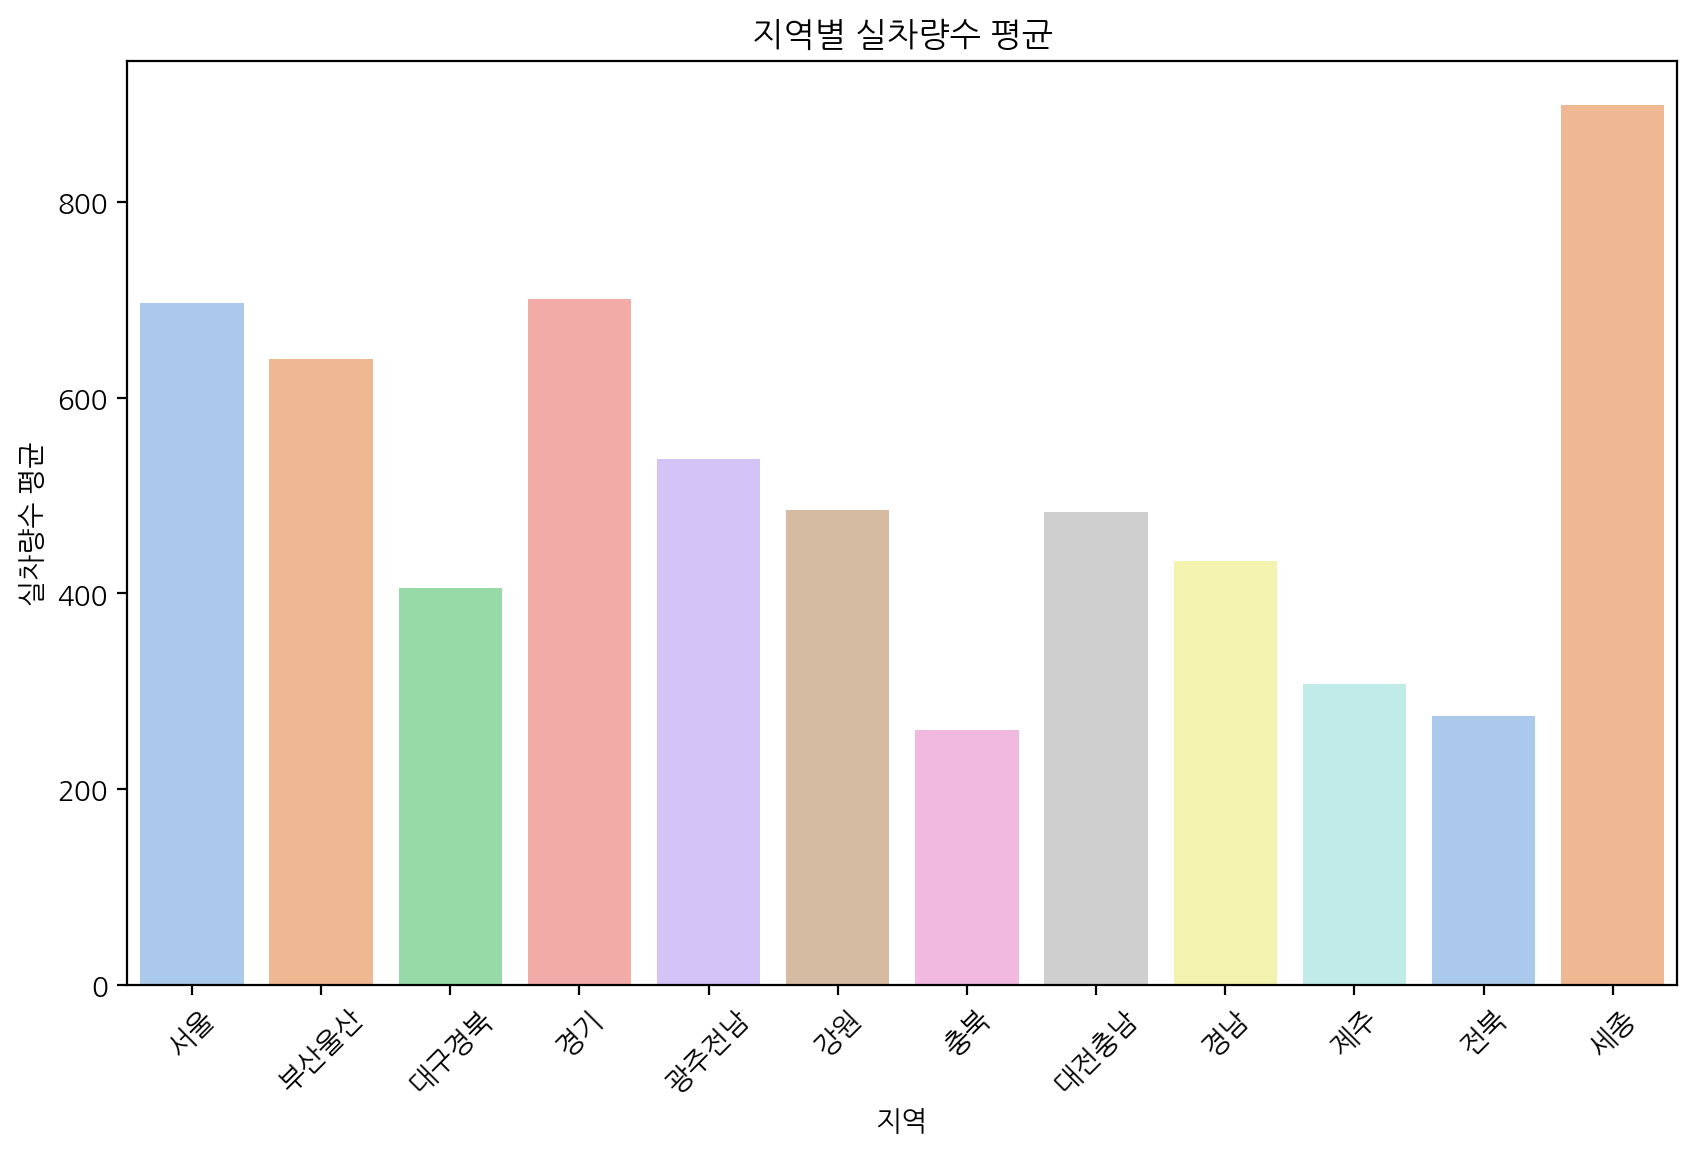

In [ ]:
plot_categorical_vs_target(apart, categorical_var='지역', target_var='실차량수')


#### 2) 준공연도

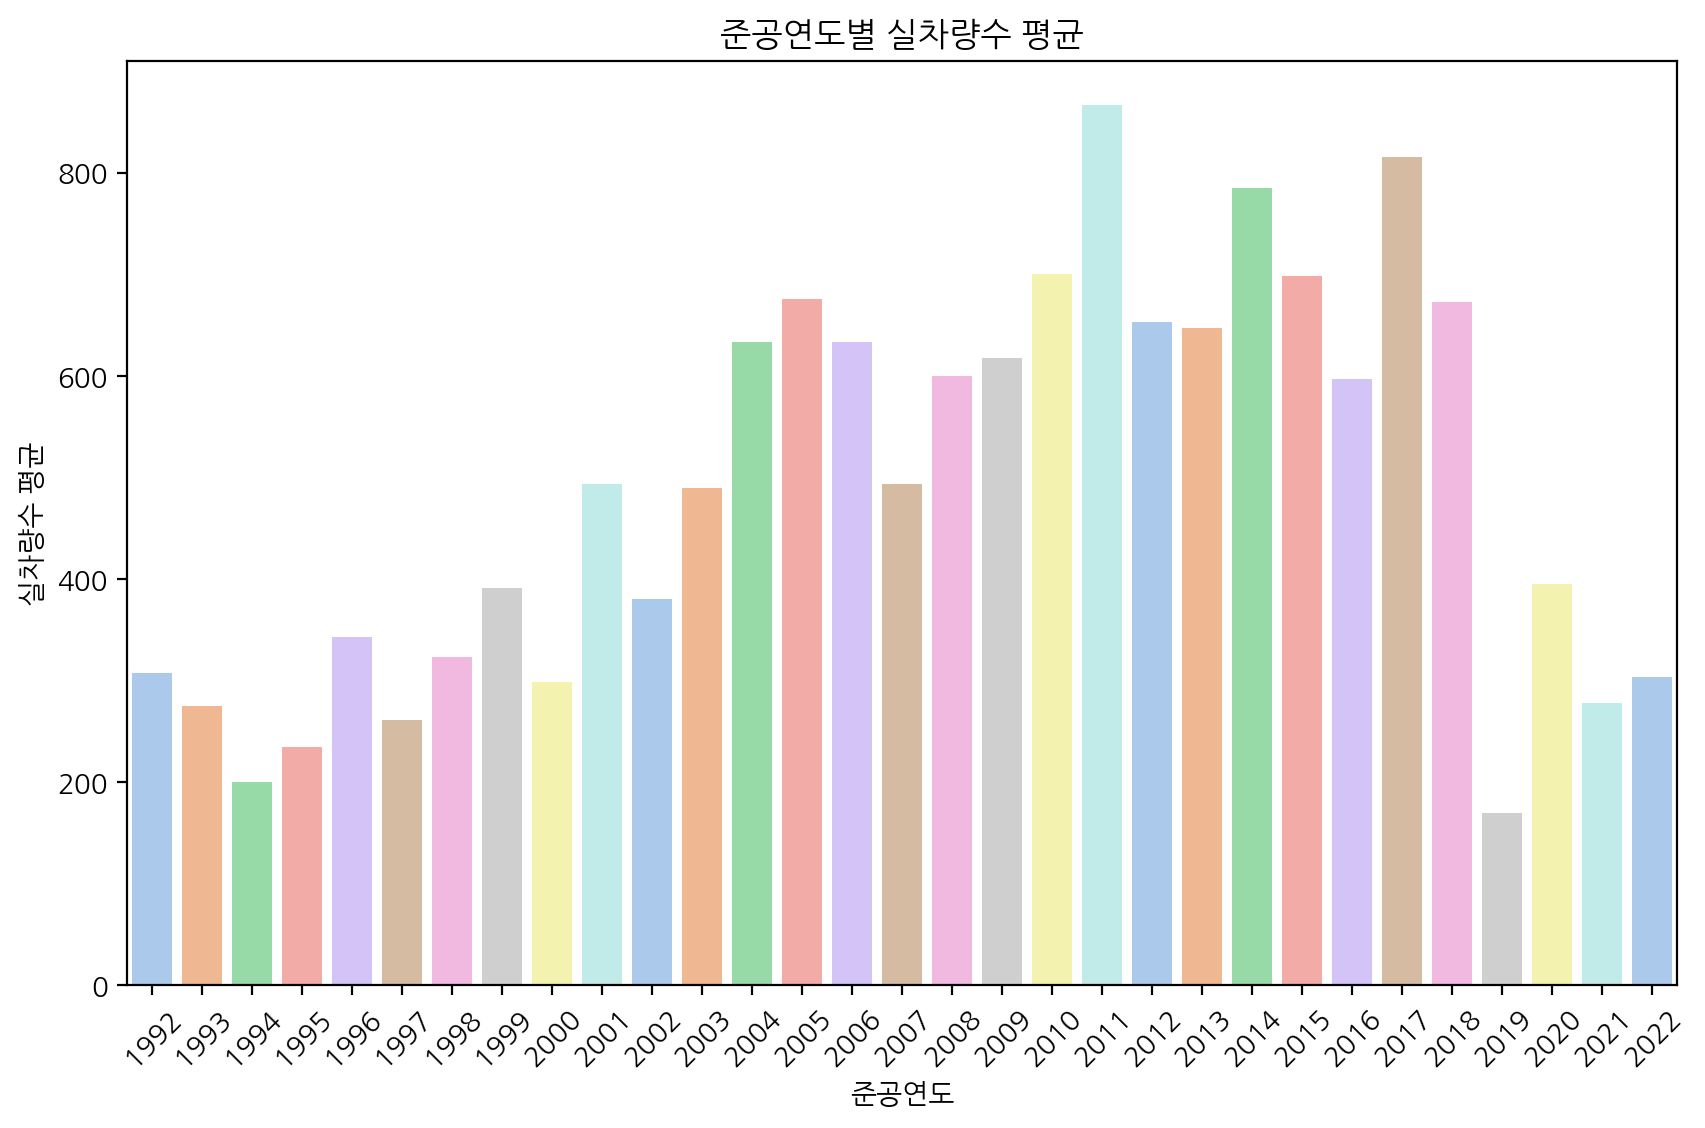

In [ ]:

plot_categorical_vs_target(apart, categorical_var='준공연도', target_var='실차량수')


#### 3) 건물형태

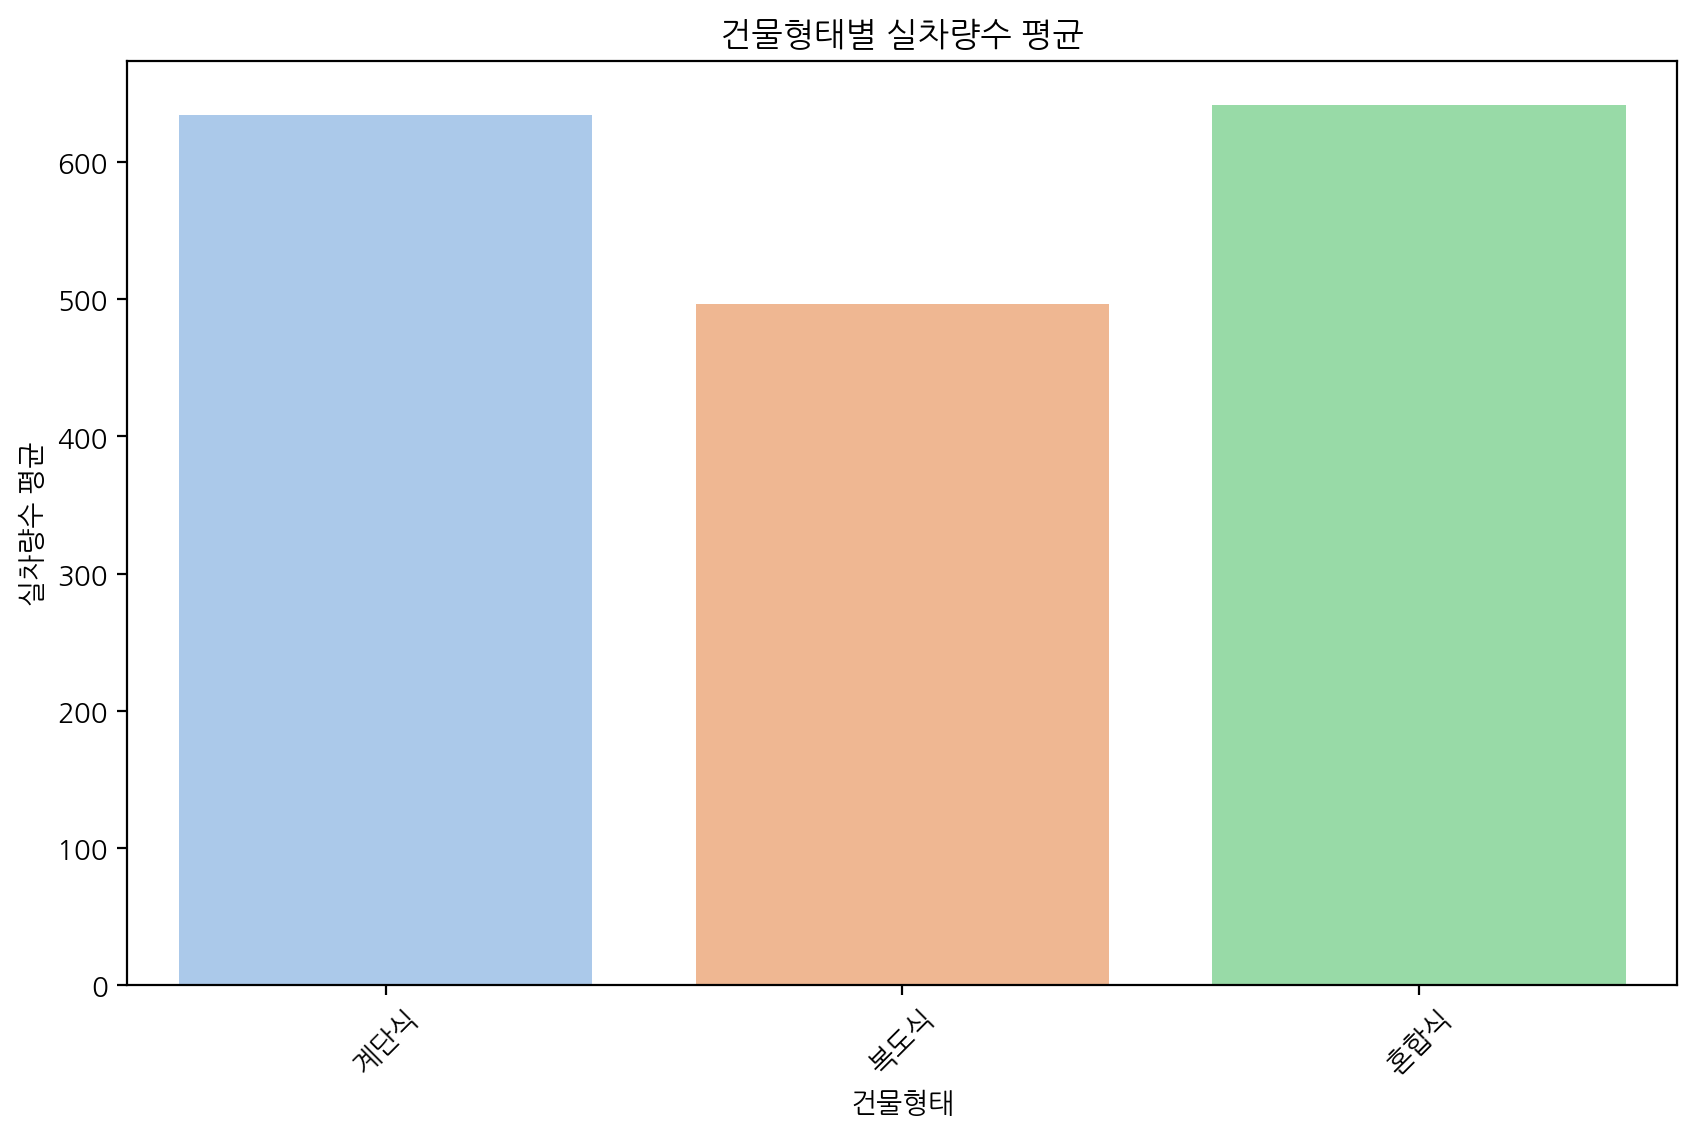

In [ ]:
plot_categorical_vs_target(apart, categorical_var='건물형태', target_var='실차량수')



#### 4) 난방방식

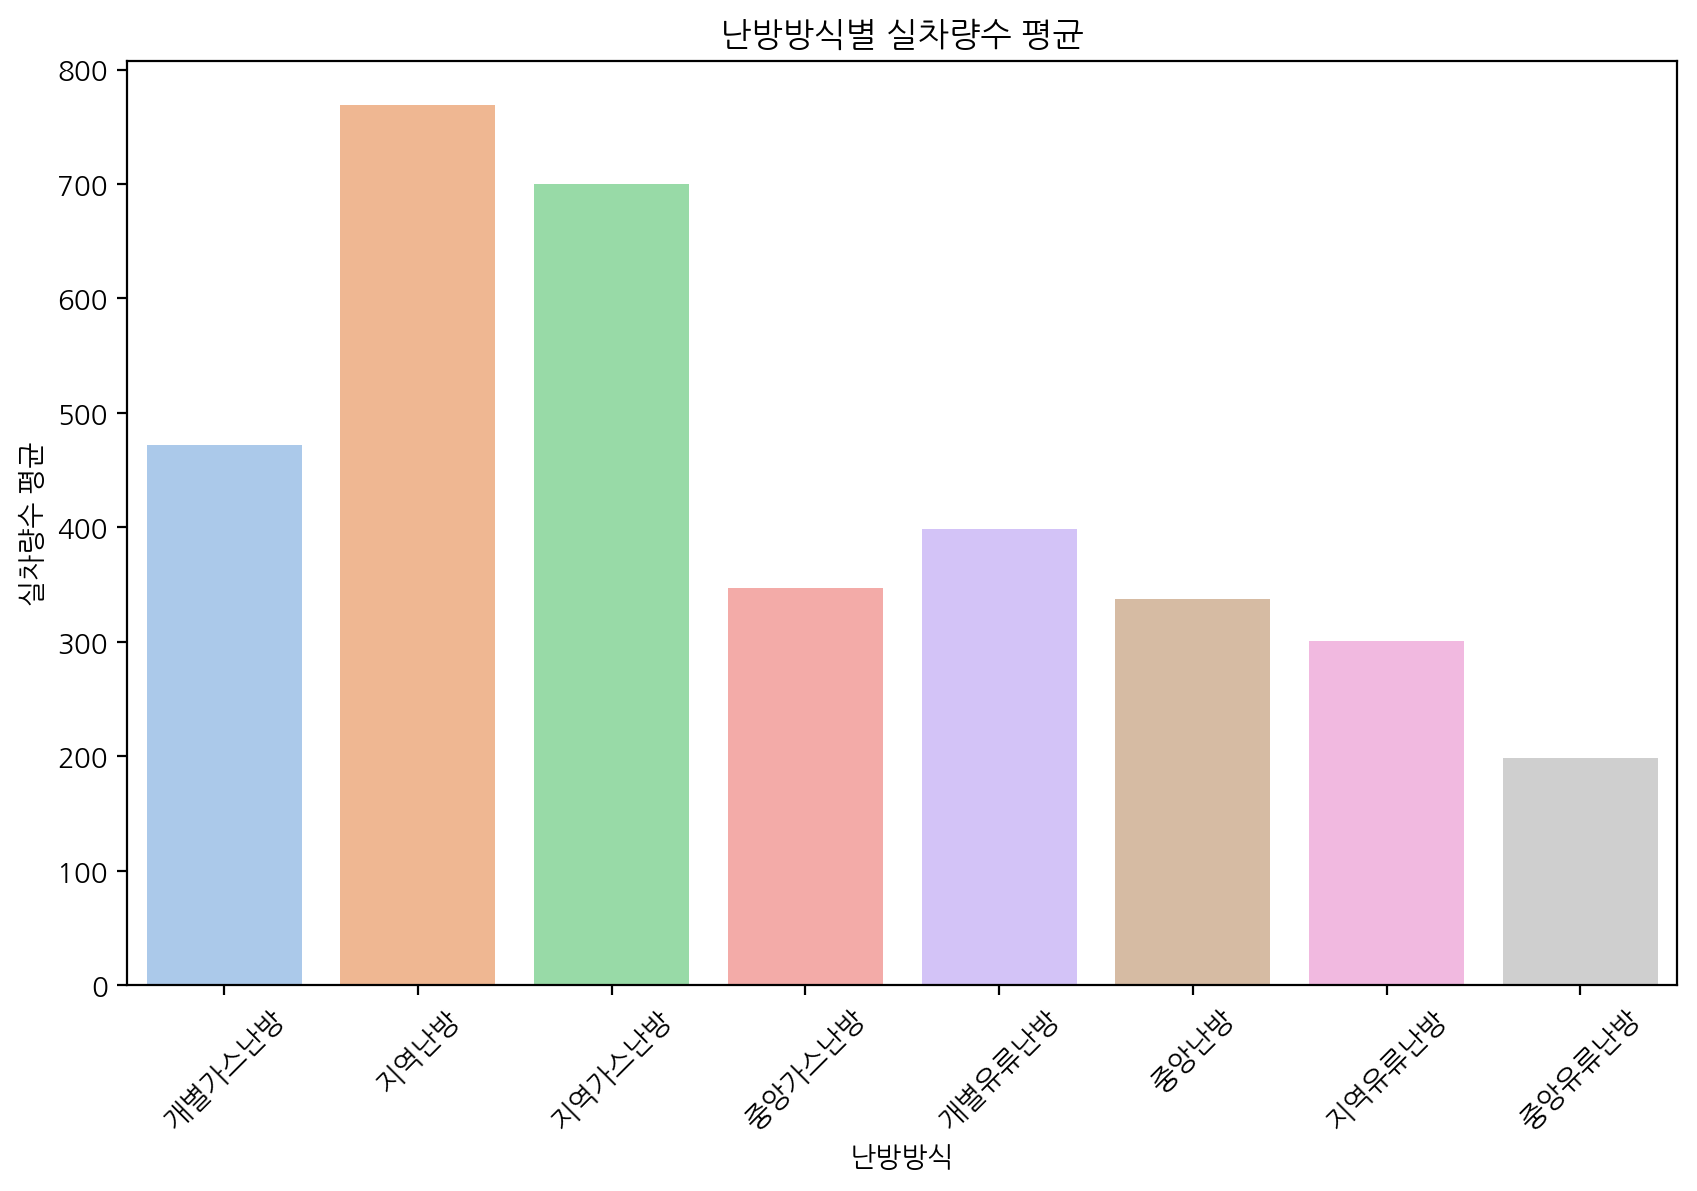

In [ ]:
plot_categorical_vs_target(apart, categorical_var='난방방식', target_var='실차량수')



#### 5) 승강기설치여부

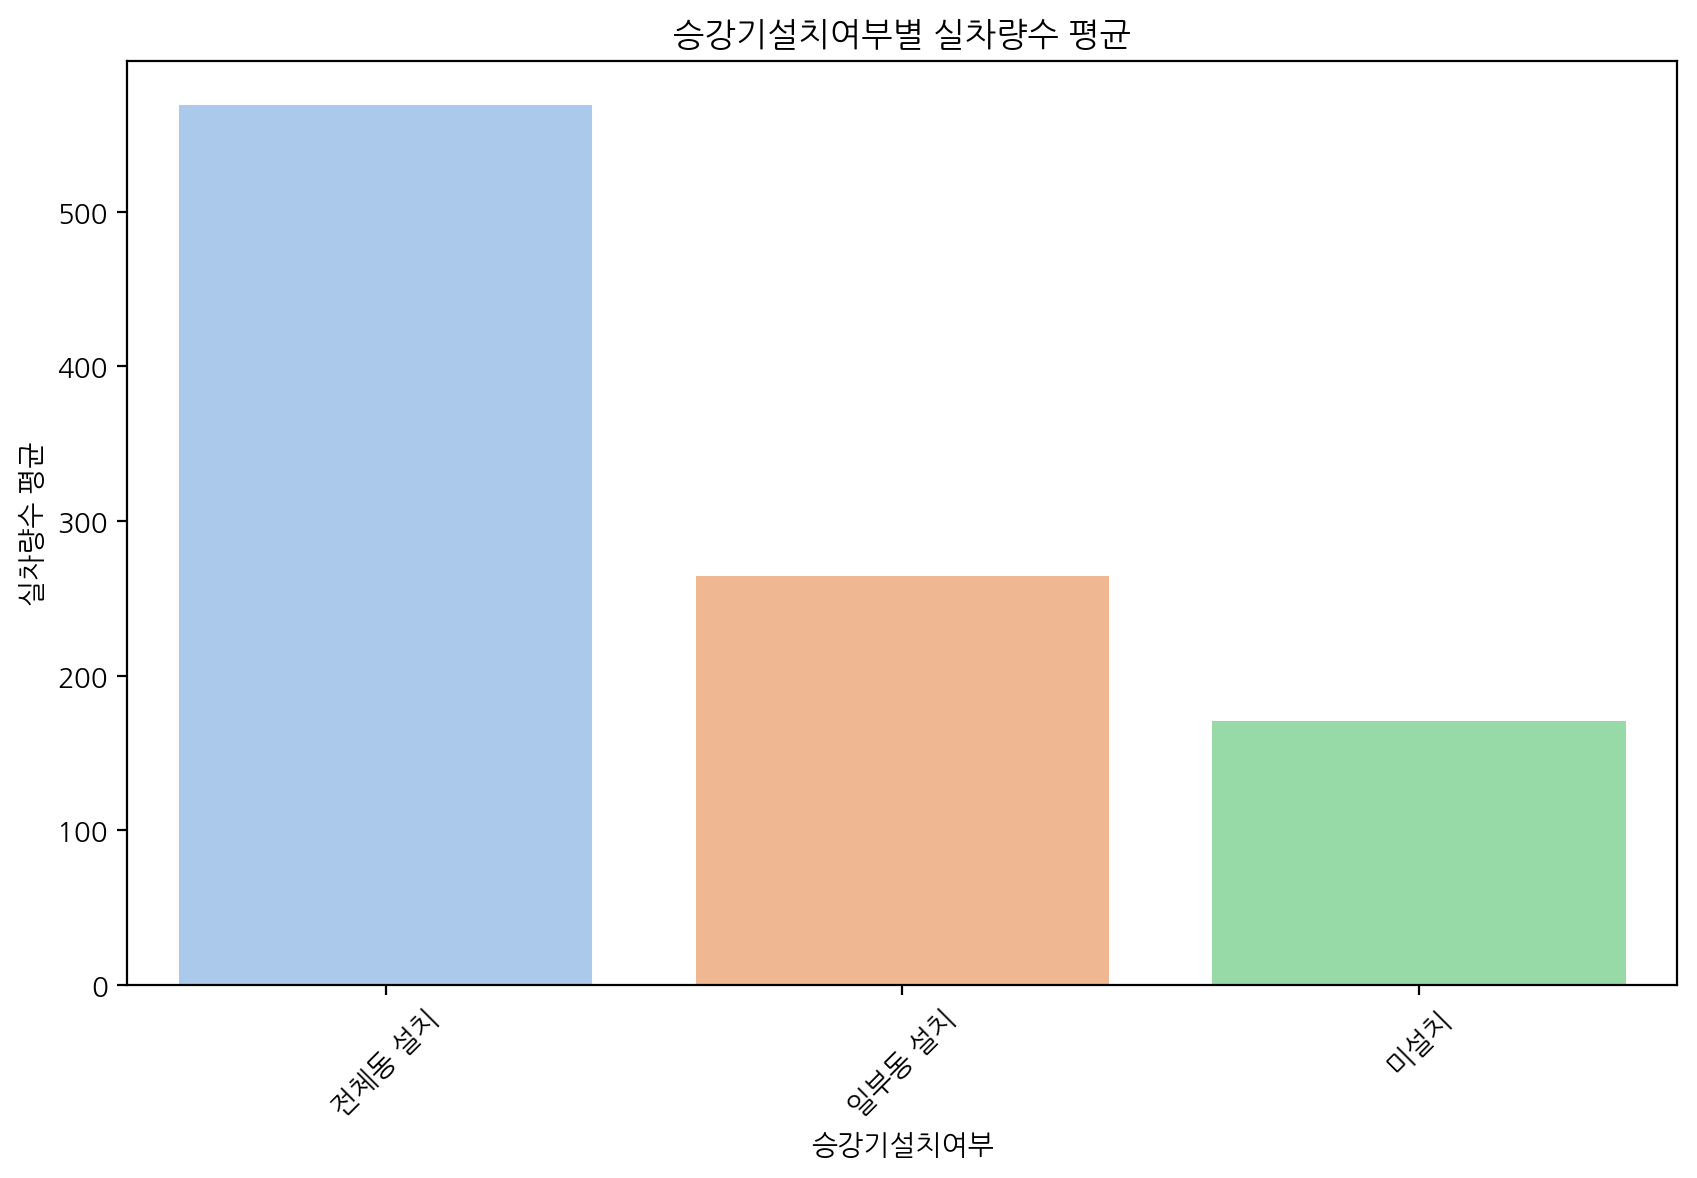

In [ ]:

plot_categorical_vs_target(apart, categorical_var='승강기설치여부', target_var='실차량수')


## 5. 추가 전처리

- '난방방식', '승강기설치여부' 두 변수에 대해서 적은 수의 범주로 묶는 작업을 진행합니다.
- '단지코드'는 개별적인 값이므로 예측과 관련이 없으니 제거합니다.
- '지역' 변수는 지역별 특성을 고려하기에는 너무 세분화 되어 있고, 특징으로 통합하기 어려우므로 제거합니다.

In [ ]:
apart.head()

,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적10-30,면적30-40,면적40-50,면적50-60,면적60-70,면적70-80,면적80-200,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별가스난방,전체동 설치,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,C0002,35,서울,2013,복도식,개별가스난방,전체동 설치,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,C0003,88,서울,2013,계단식,개별가스난방,전체동 설치,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,C0004,477,서울,2014,복도식,지역난방,전체동 설치,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,C0006,15,서울,2013,복도식,개별가스난방,전체동 설치,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333


### (1) 난방방식

- '난방방식' 변수의 값을 다음과 같이 변경하여 세 개의 범줏값만 갖게 합니다.
    - 개별가스난방 → 개별
    - 개별유류난방 → 개별
    - 지역난방 → 지역
    - 지역가스난방 → 지역
    - 지역유류난방 → 지역
    - 중앙가스난방 → 중앙
    - 중앙난방 → 중앙
    - 중앙유류난방 → 중앙

In [ ]:
apart['난방방식'] = apart['난방방식'].replace({
    '개별가스난방': '개별',
    '개별유류난방': '개별',
    '지역난방': '지역',
    '지역가스난방': '지역',
    '지역유류난방': '지역',
    '중앙가스난방': '중앙',
    '중앙난방': '중앙',
    '중앙유류난방': '중앙'
})

apart.head()

,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적10-30,면적30-40,면적40-50,면적50-60,면적60-70,면적70-80,면적80-200,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별,전체동 설치,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,C0002,35,서울,2013,복도식,개별,전체동 설치,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,C0003,88,서울,2013,계단식,개별,전체동 설치,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,C0004,477,서울,2014,복도식,지역,전체동 설치,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,C0006,15,서울,2013,복도식,개별,전체동 설치,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333


### (2) 승강기설치여부

- '승강기설치여부' 변수의 값을 다음과 같이 변경하여 0, 1 값을 갖게 합니다.
    - 전체동 설치 → 1
    - 일부동 설치 → 0
    - 미설치 → 0

In [ ]:
apart['승강기설치여부'] = apart['승강기설치여부'].replace({
    '전체동 설치': '1',
    '일부동 설치': '0',
    '미설치': '0'
})

apart.head()


,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적10-30,면적30-40,면적40-50,면적50-60,면적60-70,면적70-80,면적80-200,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별,1,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,C0002,35,서울,2013,복도식,개별,1,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,C0003,88,서울,2013,계단식,개별,1,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,C0004,477,서울,2014,복도식,지역,1,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,C0006,15,서울,2013,복도식,개별,1,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333


### (3) 단지코드, 지역 제거

- '단지코드', '지역' 변수를 제거합니다.

In [ ]:
apart = apart.drop(['단지코드', '지역'], axis=1)


- 최종 데이터를 확인합니다.

In [ ]:
apart


,총세대수,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적10-30,면적30-40,면적40-50,면적50-60,면적60-70,면적70-80,면적80-200,임대보증금,임대료
0,78,2013,계단식,개별,1,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,35,2013,복도식,개별,1,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,88,2013,계단식,개별,1,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,477,2014,복도식,지역,1,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,15,2013,복도식,개별,1,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,1485,1993,복도식,중앙,1,298,64622.2500,1181,298,0,6,0,0,0,7.595571e+06,104975.714286
341,1386,1993,복도식,중앙,1,258,56818.2100,1051,298,0,17,0,0,0,8.422286e+06,116401.428571
342,956,1994,복도식,지역,1,243,37398.7200,956,0,0,0,0,0,0,9.931000e+06,134540.000000
343,120,2020,복도식,개별,1,47,5581.8024,66,54,0,0,0,0,0,2.515500e+06,50040.000000


## 6. 데이터 셋 저장

- joblib.dump() 함수를 사용하여 최종 데이터 셋을 파일로 저장합니다.
- 파일 이름은 base_data2.pkl로 합니다.

In [ ]:
# 파일로 저장
joblib.dump(apart, path+'base_data2.pkl')

['/content/drive/MyDrive/2024.10.07_미니프로젝트 2차_실습자료/base_data2.pkl']